# Proton Energy Loss Correction using GEMC
 
FD proton inbending: [APSApril/ProtonMomentumCorrection3.ipynb](APSApril/ProtonMomentumCorrection3.ipynb)
FD proton outbending: [ProtonMomentumCorrection4.ipynb](ProtonMomentumCorrection4.ipynb)

## Load Libs


In [1]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares
import numpy

In [2]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [121]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 12,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}"     # xcolor for colours
}
matplotlib.rcParams.update(pgf_with_latex)

## outbending dvcsgen
### Load data

In [15]:
job3111_0 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/3111_CD_0.pkl")
job3111_1 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/3111_CD_1.pkl")
job3111_2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/3111_CD_2.pkl")
job3111_3 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/3111_CD_3.pkl")
job3111_4 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/3111_CD_4.pkl")
job3111_5 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/3111_CD_5.pkl")
job3111_6 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/3111_CD_6.pkl")
job3111_7 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/3111_CD_7.pkl")
job3111_8 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/3111_CD_8.pkl")
job3111_9 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/3111_CD_9.pkl")
job3111_10 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/3111_CD_10.pkl")
job3111_11 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/3111_CD_11.pkl")
job3111_12 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/3111_CD_12.pkl")
job3111_13 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/3111_CD_13.pkl")
job3111_14 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/3111_CD_14.pkl")
job3111_15 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/3111_CD_15.pkl")
job3111_16 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/3111_CD_16.pkl")
job3111_17 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/3111_CD_17.pkl")
job3111_18 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/3111_CD_18.pkl")
job3111_19 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/3111_CD_19.pkl")

In [24]:
outbending = pd.concat([globals()['job3111_'+str(i)] for i in range(20)])

In [17]:
job2942_0 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/2942_CD_0.pkl")
job2942_1 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/2942_CD_1.pkl")
job2942_2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/2942_CD_2.pkl")
job2942_3 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/2942_CD_3.pkl")
job2942_4 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/2942_CD_4.pkl")
job2942_5 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/2942_CD_5.pkl")
job2942_6 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/2942_CD_6.pkl")
job2942_7 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/2942_CD_7.pkl")
job2942_8 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/2942_CD_8.pkl")
job2942_9 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/2942_CD_9.pkl")

In [18]:
job3057_0 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/3057_CD_0.pkl")
job3057_1 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/3057_CD_1.pkl")
job3057_2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/3057_CD_2.pkl")
job3057_3 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/3057_CD_3.pkl")
job3057_4 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/3057_CD_4.pkl")
job3057_5 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/3057_CD_5.pkl")
job3057_6 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/3057_CD_6.pkl")
job3057_7 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/3057_CD_7.pkl")
job3057_8 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/3057_CD_8.pkl")
job3057_9 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/CD/3057_CD_9.pkl")

In [20]:
job2942 = pd.concat([globals()['job2942_'+str(i)] for i in range(10)])
job3057 = pd.concat([globals()['job3057_'+str(i)] for i in range(10)])
inbending = pd.concat([job2942, job3057])

In [34]:
inbendingCD = inbending.loc[inbending.Psector>7, :]
outbendingCD = outbending.loc[outbending.Psector>7, :]

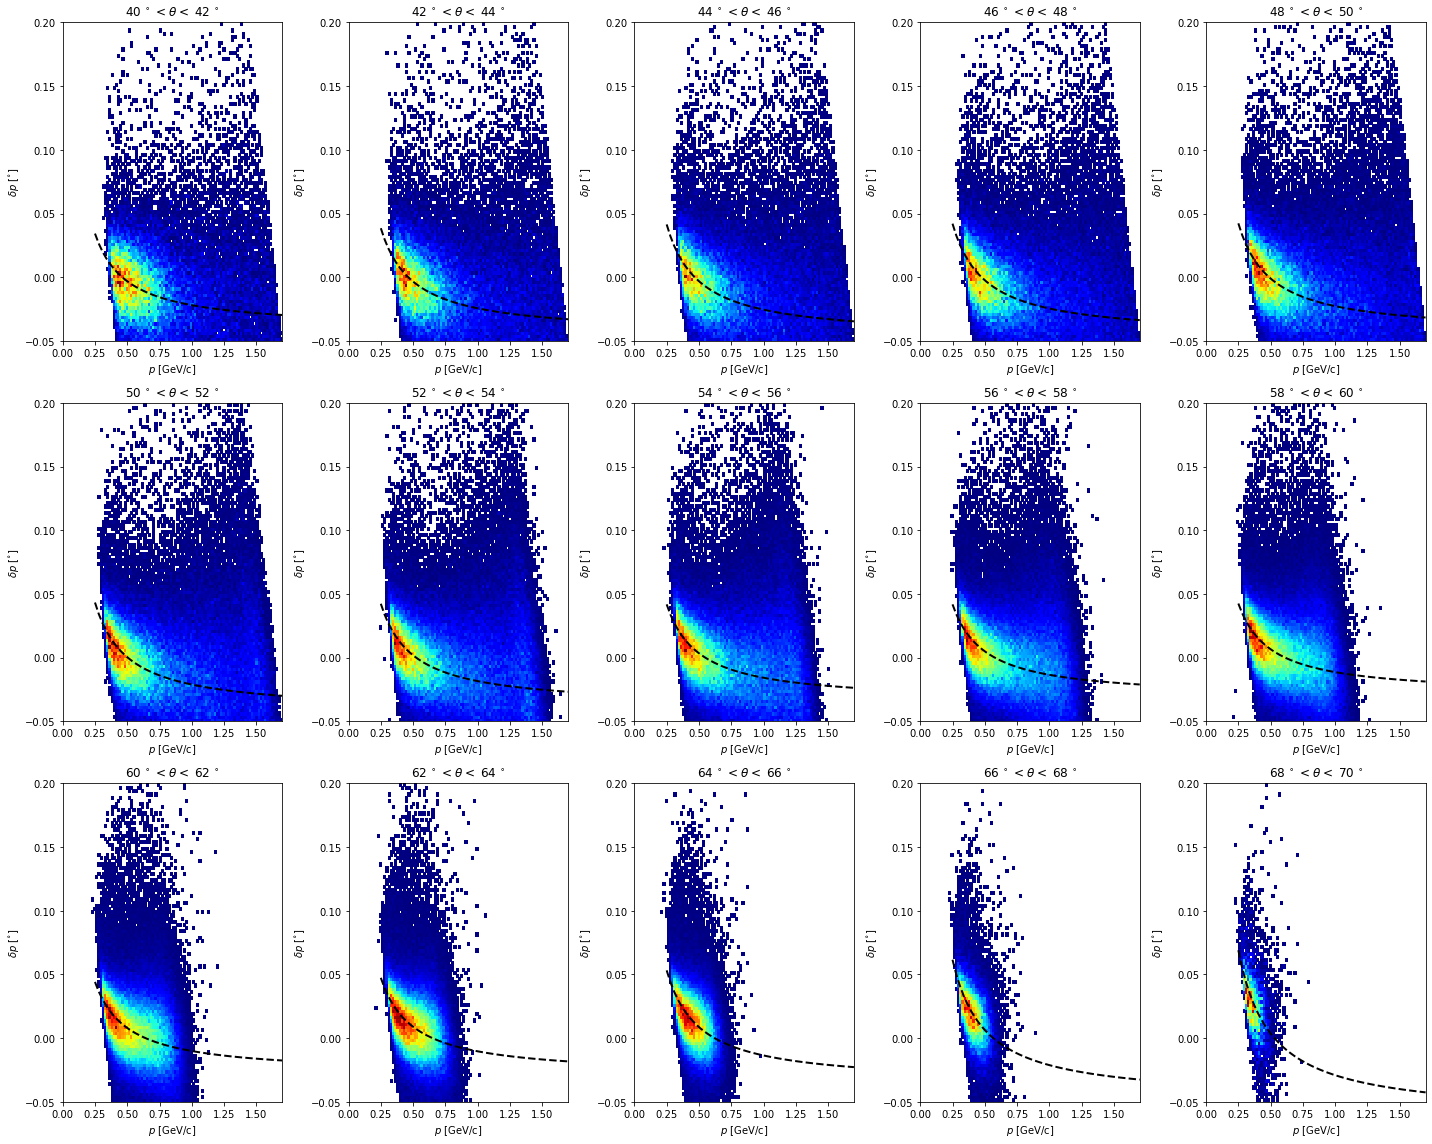

In [61]:
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingCD.Ptheta >= 2*(ind)+40) & (inbendingCD.Ptheta < 2*(ind+1)+40)
        axs[row, col].hist2d(inbendingCD.loc[thetaCond, "Pp"], inbendingCD.loc[thetaCond, "GenPp"] - inbendingCD.loc[thetaCond, "Pp"], bins = [np.linspace(0, 1.7, 101), np.linspace(-0.05, 0.2, 101)], cmap = cmap, cmin =1)
        param = params_p[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta<$ " + str(2*(ind+1)+40)+" "+degree)
plt.tight_layout()
plt.show()
# plt.savefig("correction_p_result.pdf")

In [56]:
def fun(x, t, y):
    return x[0] + x[1]/t - y

def correction(x, t):
    x0, x1 = x
    return x0 + x1/t

In [64]:
params_p = []
uncertainties_p = []
# loss = []
for i in range(15):
#     if ind<3:
    x0 = [-0.005,  0.001]
#     else:
#         x0 = [-0.02097534,  0.03317596]

    #from previous fit
#     x0s = [[-0.00954028,  0.01301059], [-0.00707975,  0.01093971], [-0.00438814,  0.00959533], [-0.01717612,  0.02865886], [-0.02014798,  0.0338319 ], [-0.03188756,  0.04206616]]
#     x0 = x0s[ind//2]

#     x0s = [[-4.80389058e-05,  4.53222098e-03],
#            [-1.23041956e-03,  6.05807042e-03],
#            [-1.76384255e-03,  6.72228344e-03],
#            [-1.88736661e-03,  7.02802014e-03],
#            [-1.79354781e-03,  7.24121971e-03],
#            [-2.90571633e-03,  9.42541929e-03],
#            [-9.47461186e-03,  1.98311802e-02],
#            [-8.07962821e-03,  1.98069365e-02],
#            [-9.23283528e-03,  2.19080106e-02],
#            [-9.56769814e-03,  2.29519214e-02],
#            [-9.68958476e-03,  2.28616792e-02],
#            [-1.10693927e-02,  2.45928549e-02],
#            [-1.03538529e-02,  2.48101827e-02],
#            [-1.12320275e-02,  2.59453728e-02],
#            [-1.24223334e-02,  2.73036576e-02],
#            [-1.19610320e-02,  2.74316186e-02],
#            [-1.25053015e-02,  2.80233161e-02],
#            [-1.49314572e-02,  2.99888234e-02],
#            [-1.60389360e-02,  3.06035474e-02],
#            [-2.36705524e-02,  3.55724193e-02]]
#     x0 = x0s[ind]
    
    thetaCond = (inbendingCD.Ptheta >= 2*i+40) & (inbendingCD.Ptheta < 2*(i+1)+40)
    dfi = copy(inbendingCD.loc[thetaCond, ["Pp", "GenPp"]])
    dffit = copy(dfi[np.abs(dfi["GenPp"]-dfi["Pp"]-correction(x0, dfi["Pp"]))<0.05])
    for i in range (0, 10):
        res_lsq = least_squares(fun, x0, args=(dffit["Pp"], (dffit["GenPp"]-dffit["Pp"])))    
        dffit = copy(dfi[np.abs(dfi["GenPp"]-dfi["Pp"]-correction(res_lsq.x, dfi["Pp"]))<0.05])
        x0 = res_lsq.x
    
    params_p.append(res_lsq.x)
    
    # uncertainty
    # https://github.com/scipy/scipy/blob/2526df72e5d4ca8bad6e2f4b3cbdfbc33e805865/scipy/optimize/minpack.py#L739
    _, s, VT = np.linalg.svd(res_lsq.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(res_lsq.jac.shape) * s[0]
    s = s[s > threshold]
    VT = VT[:s.size]
    pcov = np.dot(VT.T / s**2, VT)
    s_sq = np.sum((dfi["GenPp"]-dfi["Pp"]-correction(res_lsq.x, dfi["Pp"]))**2) / (len(dfi) - len(x0))
    pcov = pcov * s_sq
    uncertainties_p.append(np.sqrt(np.diag(pcov)))

In [65]:
params_p = np.array(params_p)
consts_p = params_p[:, 0]
coeffs_p = params_p[:, 1]

uncertainties_p = np.array(uncertainties_p)
consts_uncertainties_p = uncertainties_p[:, 0]
coeffs_uncertainties_p = uncertainties_p[:, 1]

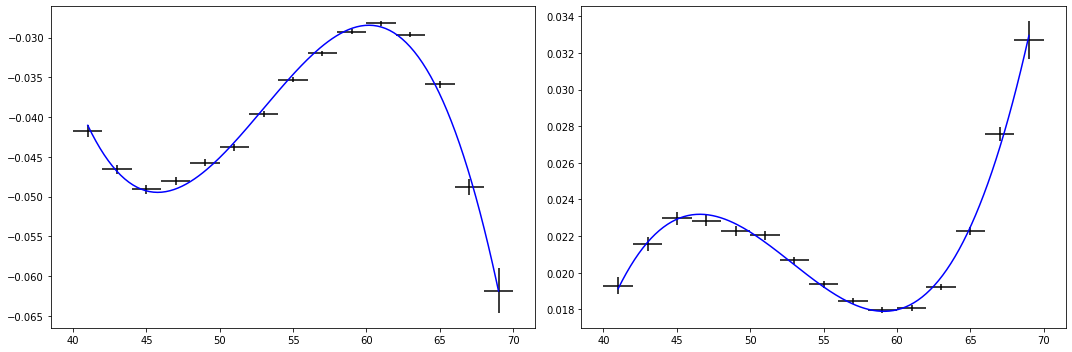

In [97]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].errorbar(np.linspace(0, 14, 15)*2+41, consts_p, xerr= 1, yerr = consts_uncertainties_p, color='k', linestyle = '')
ax[1].errorbar(np.linspace(0, 14, 15)*2+41, coeffs_p, xerr= 1, yerr = coeffs_uncertainties_p, color='k', linestyle = '')
ax[0].plot(np.linspace(0, 14, 201)*2+41, correction5(param1_p, np.linspace(0, 14, 201)*2+41), color = 'b')
# ax[0].plot(np.linspace(27, 40, 101), correction3(param3_p, np.linspace(26, 40, 101)), color = 'b')

ax[1].plot(np.linspace(0, 14, 201)*2+41, correction5(param2_p, np.linspace(0, 14, 201)*2+41), color = 'b')
# ax[1].plot(np.linspace(27, 40, 101), correction3(param4_p, np.linspace(26, 40, 101)), color = 'b')

plt.tight_layout()
plt.show()
# plt.savefig("correction_phi.pdf")

In [72]:
x = np.linspace(0, 14, 15)*2+41

res_lsq = least_squares(fun5, [0, 0, 0, 0], args=(x, consts_p))    
param1_p = res_lsq.x
res_lsq = least_squares(fun5, [0, 0, 0, 0], args=(x, coeffs_p))    
param2_p = res_lsq.x

In [67]:
def fun2(x, t, y):
    return x[0] + x[1]*t- y
def correction2(x, t):
    x0, x1 = x
    return x0 + x1*t

def fun3(x, t, y):
    return x[0] + x[1]*t + x[2]*t*t - y
def correction3(x, t):
    x0, x1, x2 = x
    return x0 + x1*t + x2*t*t

def fun5(x, t, y):
    return x[0] + x[1]*t + x[2]*t*t +x[3]*t*t*t - y

def correction5(x, t):
    x0, x1, x2, x3 = x
    return x0 + x1*t + x2*t*t + x3*t*t*t

In [75]:
print(param1_p)

[ 1.93686914e+00 -1.16288824e-01  2.23685833e-03 -1.40771969e-05]


In [76]:
print(param2_p)

[-7.38047800e-01  4.43343685e-02 -8.50985972e-04  5.36810280e-06]


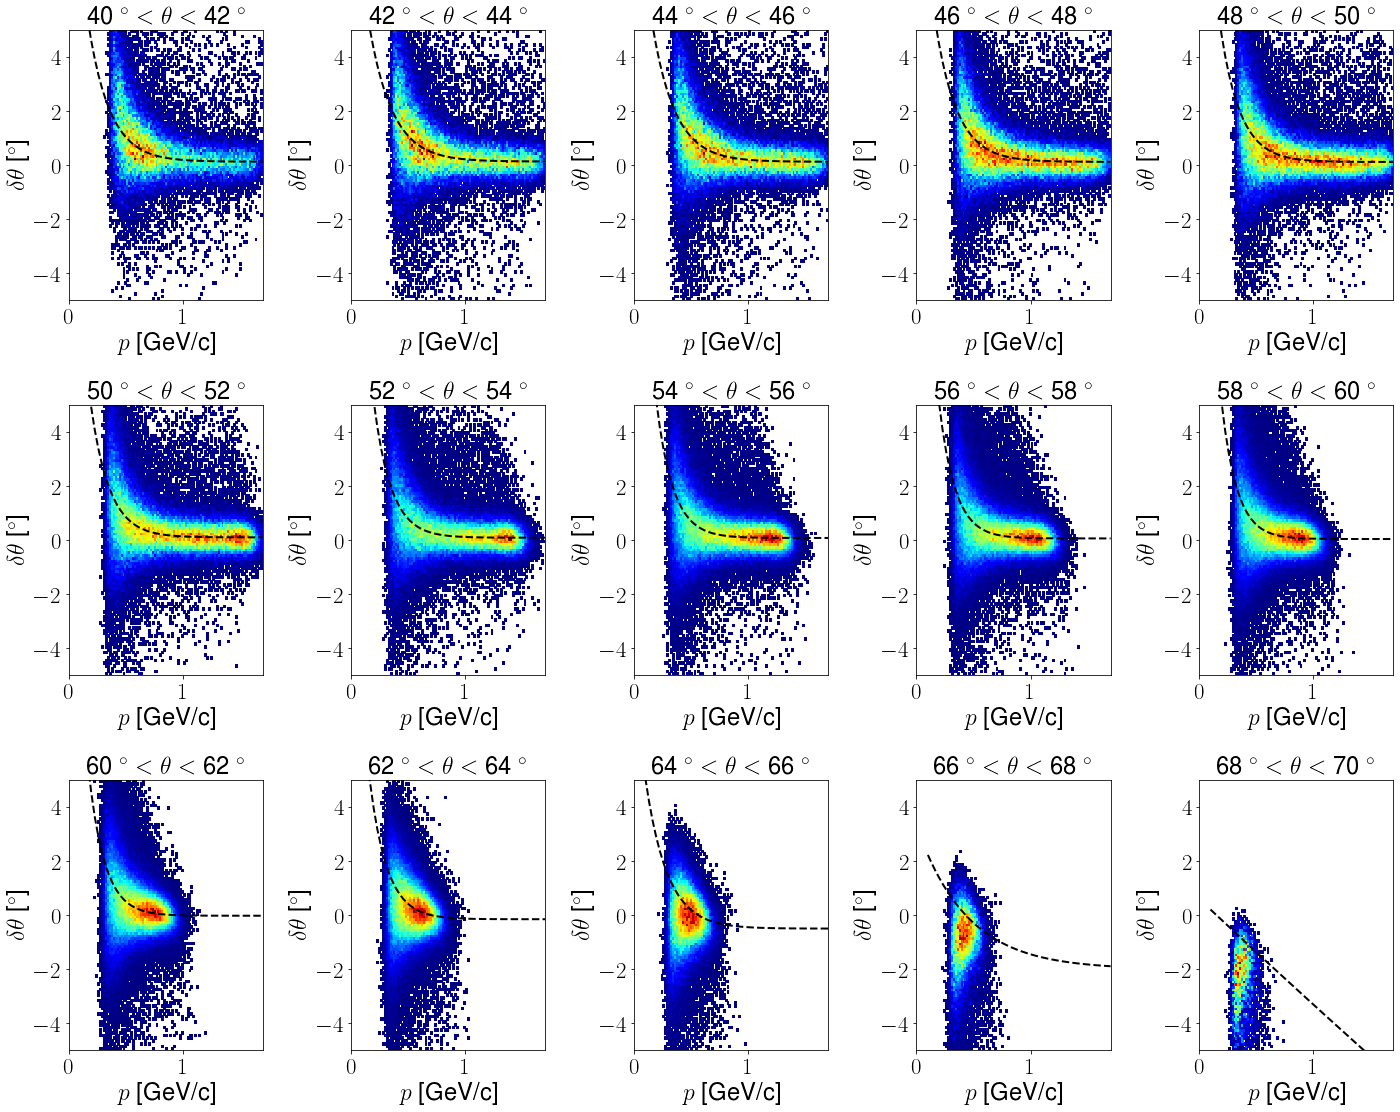

In [126]:
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingCD.Ptheta >= 2*(ind)+40) & (inbendingCD.Ptheta < 2*(ind+1)+40)
        axs[row, col].hist2d(inbendingCD.loc[thetaCond, "Pp"], inbendingCD.loc[thetaCond, "GenPtheta"] - inbendingCD.loc[thetaCond, "Ptheta"], bins = [np.linspace(0, 1.7, 101), np.linspace(-5, 5, 101)], cmap = cmap, cmin =1)
        param = params_theta[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.1, 1.7, 51), correction4(param, np.linspace(0.1, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta<$ " + str(2*(ind+1)+40)+" "+degree)
plt.tight_layout()
plt.show()
# plt.savefig("correction_p_result.pdf")

In [78]:
def fun4(x, t, y):
    return x[0] + x[1]*np.exp(x[2]*t) - y
def correction4(x, t):
    x0, x1, x2 = x
    return x0 + x1*np.exp(x2*t)

In [83]:
params_theta = []
uncertainties_theta = []
# loss = []
for ind in range(15):
#     x0 = [-0.16080697, 8.59241295, -3.85634824]
    x0 = res_lsq.x
    thetaCond = (inbendingCD.Ptheta >= 2*ind+40) & (inbendingCD.Ptheta < 2*ind+42)
    dfi = copy(inbendingCD.loc[thetaCond, ["Pp", "GenPtheta", "Ptheta"]])
    dffit = copy(dfi[np.abs(dfi["GenPtheta"]-dfi["Ptheta"]-correction4(x0, dfi["Pp"]))<.5])
    for i in range (0, 5):
        res_lsq = least_squares(fun4, x0, args=(dffit["Pp"], (dffit["GenPtheta"]-dffit["Ptheta"])))    
        dffit = copy(dfi[np.abs(dfi["GenPtheta"]-dfi["Ptheta"]-correction4(res_lsq.x, dfi["Pp"]))<.5])
        x0 = res_lsq.x
    
    params_theta.append(res_lsq.x)
    
    # uncertainty
    # https://github.com/scipy/scipy/blob/2526df72e5d4ca8bad6e2f4b3cbdfbc33e805865/scipy/optimize/minpack.py#L739
    _, s, VT = np.linalg.svd(res_lsq.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(res_lsq.jac.shape) * s[0]
    s = s[s > threshold]
    VT = VT[:s.size]
    pcov = np.dot(VT.T / s**2, VT)
    s_sq = np.sum((dfi["GenPtheta"]-dfi["Ptheta"]-correction4(res_lsq.x, dfi["Pp"]))**2) / (len(dfi) - len(x0))
    pcov = pcov * s_sq
    uncertainties_theta.append(np.sqrt(np.diag(pcov)))

# params_theta[0] = params_theta[3]
# params_theta[1] = params_theta[3]
# params_theta[2] = params_theta[3]

# uncertainties_theta[0] = uncertainties_theta[3]
# uncertainties_theta[1] = uncertainties_theta[3]
# uncertainties_theta[2] = uncertainties_theta[3]

In [92]:
params_theta = np.array(params_theta)
consts_theta = params_theta[:, 0]
coeffs_theta = params_theta[:, 1]
coeffs2_theta = params_theta[:, 2]

uncertainties_theta = np.array(uncertainties_theta)
consts_uncertainties_theta = uncertainties_theta[:, 0]
coeffs_uncertainties_theta = uncertainties_theta[:, 1]
coeffs2_uncertainties_theta = uncertainties_theta[:, 2]

In [111]:
def fun6(x, t, y):
    return x[0] + x[1]*t + x[2]*t*t +x[3]*t*t*t +x[4]*t**4 - y

def correction6(x, t):
    x0, x1, x2, x3, x4 = x
    return x0 + x1*t + x2*t*t + x3*t*t*t + x4*t**4

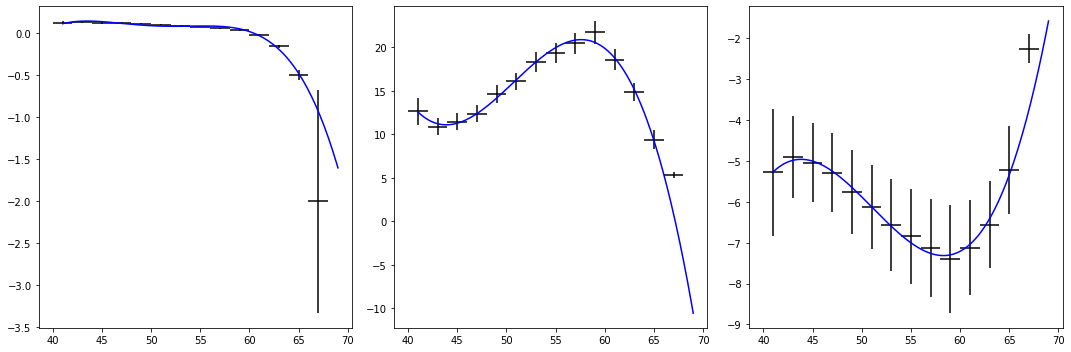

In [117]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
# ax[0].errorbar(np.linspace(0, 12, 13)*2+41, consts_theta[:-2], xerr= 1, yerr = consts_uncertainties_theta[:-2], color='k', linestyle = '')
# ax[1].errorbar(np.linspace(0, 12, 13)*2+41, coeffs_theta[:-2], xerr= 1, yerr = coeffs_uncertainties_theta[:-2], color='k', linestyle = '')
# ax[2].errorbar(np.linspace(0, 12, 13)*2+41, coeffs2_theta[:-2], xerr= 1, yerr = coeffs_uncertainties_theta[:-2], color='k', linestyle = '')
ax[0].errorbar(np.linspace(0, 13, 14)*2+41, consts_theta[:-1], xerr= 1, yerr = consts_uncertainties_theta[:-1], color='k', linestyle = '')
ax[1].errorbar(np.linspace(0, 13, 14)*2+41, coeffs_theta[:-1], xerr= 1, yerr = coeffs_uncertainties_theta[:-1], color='k', linestyle = '')
ax[2].errorbar(np.linspace(0, 13, 14)*2+41, coeffs2_theta[:-1], xerr= 1, yerr = coeffs_uncertainties_theta[:-1], color='k', linestyle = '')

ax[0].plot(np.linspace(0, 14, 201)*2+41, correction6(param1_theta, np.linspace(0, 14, 201)*2+41), color = 'b')

ax[1].plot(np.linspace(0, 14, 201)*2+41, correction5(param2_theta, np.linspace(0, 14, 201)*2+41), color = 'b')
# ax[1].plot(np.linspace(27, 40, 101), correction3(param4_theta, np.linspace(26, 40, 101)), color = 'b')

ax[2].plot(np.linspace(0, 14, 201)*2+41, correction5(param3_theta, np.linspace(0, 14, 201)*2+41), color = 'b')

plt.tight_layout()
plt.show()
# plt.savefig("correction_thetahi.pdf")

In [113]:
x = np.linspace(0, 12, 13)*2+41

res_lsq = least_squares(fun6, [0, 0, 0, 0, 0], args=(x, consts_theta[:-2]))    
param1_theta = res_lsq.x
res_lsq = least_squares(fun5, [0, 0, 0, 0], args=(x, coeffs_theta[:-2]))    
param2_theta = res_lsq.x
res_lsq = least_squares(fun5, [0, 0, 0, 0], args=(x, coeffs2_theta[:-2]))    
param3_theta = res_lsq.x

In [120]:
print(param1_theta,"\n", param2_theta,"\n", param3_theta)

[-1.09849291e+02  8.86664014e+00 -2.66438818e-01  3.53814210e-03
 -1.75297107e-05] 
 [ 9.52034523e+02 -5.74808292e+01  1.15386949e+00 -7.57970373e-03] 
 [-2.00387313e+02  1.18979079e+01 -2.37730217e-01  1.55153003e-03]


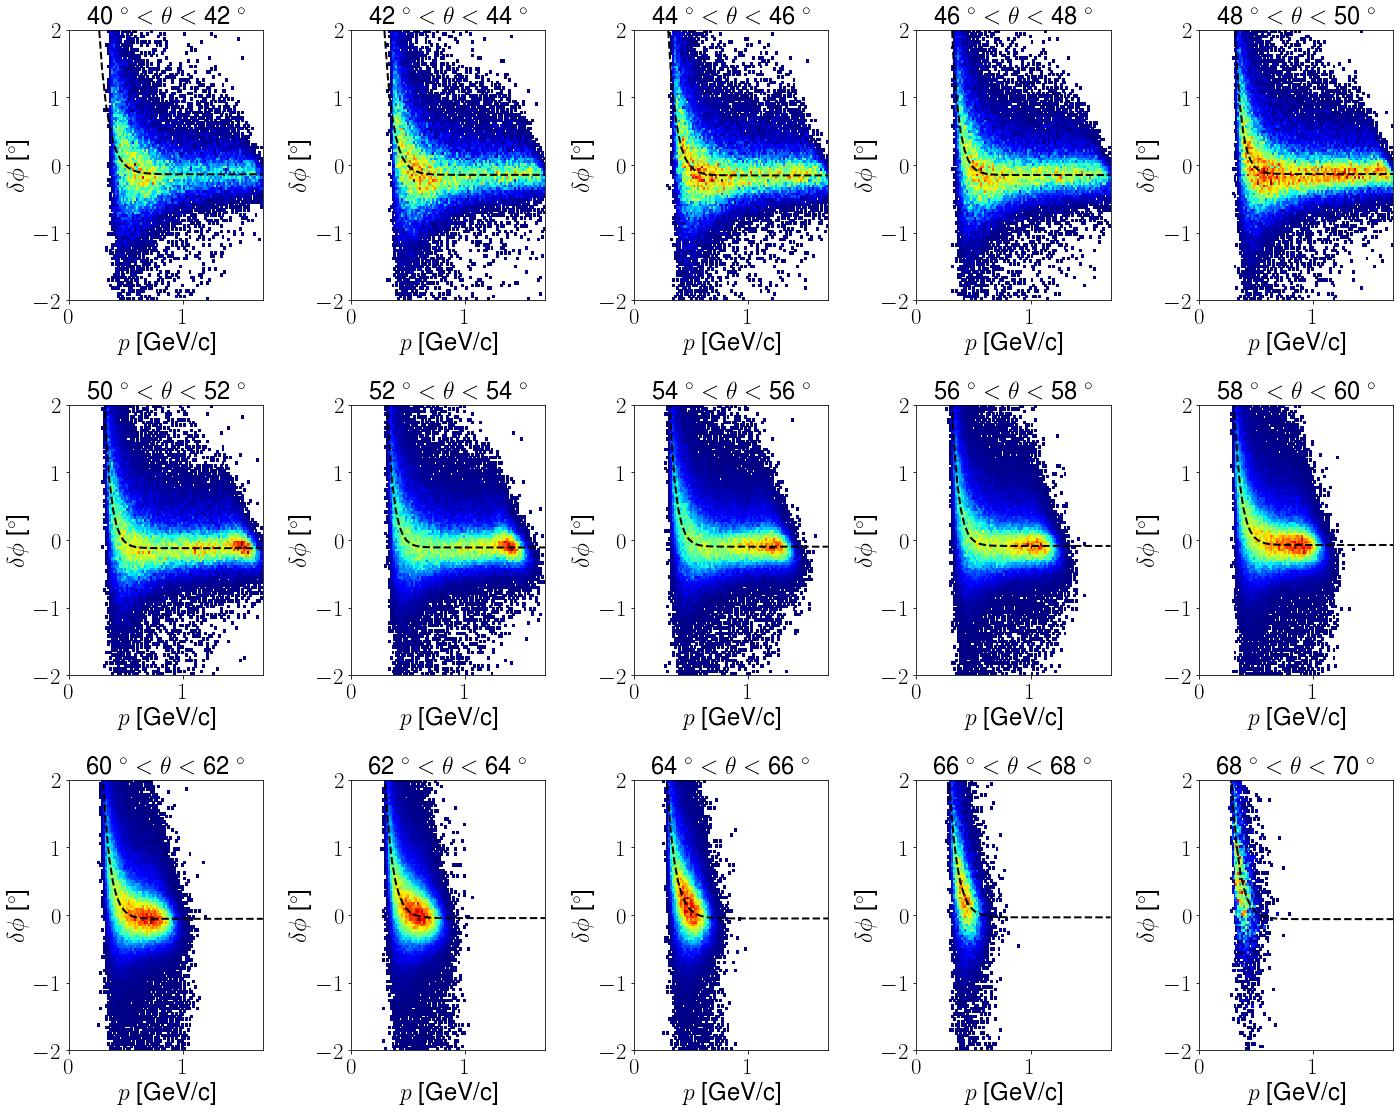

In [172]:
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingCD.Ptheta >= 2*(ind)+40) & (inbendingCD.Ptheta < 2*(ind+1)+40)
        axs[row, col].hist2d(inbendingCD.loc[thetaCond, "Pp"], inbendingCD.loc[thetaCond, "GenPphi"] - inbendingCD.loc[thetaCond, "Pphi"], bins = [np.linspace(0, 1.7, 101), np.linspace(-2, 2, 101)], cmap = cmap, cmin =1)
        param = params_phi[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.1, 1.7, 51), correction4([-0.2, 3, -5], np.linspace(0.1, 1.7, 51)), color='k', linewidth=2, linestyle='--')
        axs[row, col].plot(np.linspace(0.1, 1.7, 51), correction4(param, np.linspace(0.1, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta<$ " + str(2*(ind+1)+40)+" "+degree)
plt.tight_layout()
plt.show()
# plt.savefig("correction_p_result.pdf")

In [169]:
params_phi = []
uncertainties_phi = []
# loss = []
for ind in range(15):
    
    x0 = res_lsq.x
#     x0 = [-0.2, 50, -15]

    thetaCond = (inbendingCD.Ptheta >= 2*ind+40) & (inbendingCD.Ptheta < 2*ind+42)
    dfi = copy(inbendingCD.loc[thetaCond, ["Pp", "GenPphi", "Pphi"]])
    dffit = copy(dfi[np.abs(dfi["GenPphi"]-dfi["Pphi"]-correction4(x0, dfi["Pp"]))<.3])
    for i in range (0, 5):
        res_lsq = least_squares(fun4, x0, args=(dffit["Pp"], (dffit["GenPphi"]-dffit["Pphi"])))    
        dffit = copy(dfi[np.abs(dfi["GenPphi"]-dfi["Pphi"]-correction4(res_lsq.x, dfi["Pp"]))<.3])
        x0 = res_lsq.x
    
    params_phi.append(res_lsq.x)
    
    # uncertainty
    # https://github.com/scipy/scipy/blob/2526df72e5d4ca8bad6e2f4b3cbdfbc33e805865/scipy/optimize/minpack.py#L739
    _, s, VT = np.linalg.svd(res_lsq.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(res_lsq.jac.shape) * s[0]
    s = s[s > threshold]
    VT = VT[:s.size]
    pcov = np.dot(VT.T / s**2, VT)
    s_sq = np.sum((dffit["GenPphi"]-dffit["Pphi"]-correction4(res_lsq.x, dfi["Pp"]))**2) / (len(dffit) - len(x0))
    pcov = pcov * s_sq
    uncertainties_phi.append(np.sqrt(np.diag(pcov)))

# params_phi[0] = params_phi[3]
# params_phi[1] = params_phi[3]
# params_phi[2] = params_phi[3]

# uncertainties_phi[0] = uncertainties_phi[3]
# uncertainties_phi[1] = uncertainties_phi[3]
# uncertainties_phi[2] = uncertainties_phi[3]

In [170]:
params_phi = np.array(params_phi)
consts_phi = params_phi[:, 0]
coeffs_phi = params_phi[:, 1]
coeffs2_phi = params_phi[:, 2]

uncertainties_phi = np.array(uncertainties_phi)
consts_uncertainties_phi = uncertainties_phi[:, 0]
coeffs_uncertainties_phi = uncertainties_phi[:, 1]
coeffs2_uncertainties_phi = uncertainties_phi[:, 2]

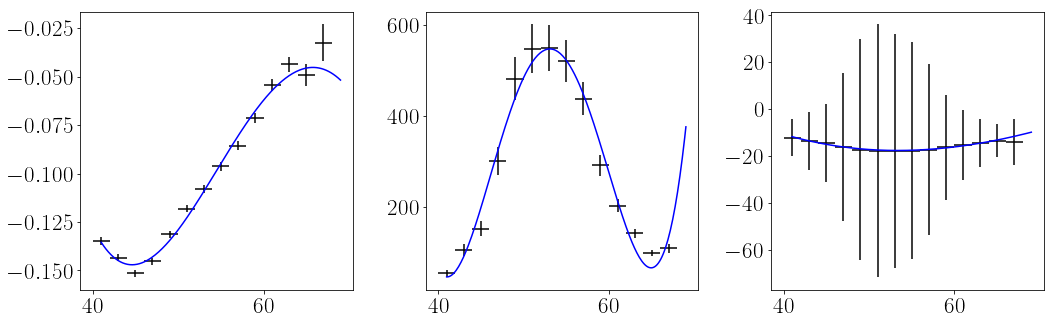

In [180]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
# ax[0].errorbar(np.linspace(0, 12, 13)*2+41, consts_phi[:-2], xerr= 1, yerr = consts_uncertainties_phi[:-2], color='k', linestyle = '')
# ax[1].errorbar(np.linspace(0, 12, 13)*2+41, coeffs_phi[:-2], xerr= 1, yerr = coeffs_uncertainties_phi[:-2], color='k', linestyle = '')
# ax[2].errorbar(np.linspace(0, 12, 13)*2+41, coeffs2_phi[:-2], xerr= 1, yerr = coeffs_uncertainties_phi[:-2], color='k', linestyle = '')
ax[0].errorbar(np.linspace(0, 13, 14)*2+41, consts_phi[:-1], xerr= 1, yerr = consts_uncertainties_phi[:-1], color='k', linestyle = '')
ax[1].errorbar(np.linspace(0, 13, 14)*2+41, coeffs_phi[:-1], xerr= 1, yerr = coeffs_uncertainties_phi[:-1], color='k', linestyle = '')
ax[2].errorbar(np.linspace(0, 13, 14)*2+41, coeffs2_phi[:-1], xerr= 1, yerr = coeffs_uncertainties_phi[:-1], color='k', linestyle = '')

ax[0].plot(np.linspace(0, 14, 201)*2+41, correction6(param1_phi, np.linspace(0, 14, 201)*2+41), color = 'b')

ax[1].plot(np.linspace(0, 14, 201)*2+41, correction6(param2_phi, np.linspace(0, 14, 201)*2+41), color = 'b')
# ax[1].plot(np.linspace(27, 40, 101), correction3(param4_phi, np.linspace(26, 40, 101)), color = 'b')

ax[2].plot(np.linspace(0, 14, 201)*2+41, correction5(param3_phi, np.linspace(0, 14, 201)*2+41), color = 'b')

plt.tight_layout()
plt.show()
# plt.savefig("correction_phihi.pdf")

In [178]:
x = np.linspace(0, 12, 13)*2+41
x2 = np.linspace(0, 13, 14)*2+41
res_lsq = least_squares(fun6, [0, 0, 0, 0, 0], args=(x, consts_phi[:-2]))    
param1_phi = res_lsq.x
res_lsq = least_squares(fun6, [0, 0, 0, 0, 0], args=(x2, coeffs_phi[:-1]))    
param2_phi = res_lsq.x
res_lsq = least_squares(fun5, [0, 0, 0, 0], args=(x, coeffs2_phi[:-2]))    
param3_phi = res_lsq.x

In [182]:
print(param1_phi, "\n", param2_phi, "\n", param3_phi)

[ 4.94546178e+00 -3.26662886e-01  7.39069603e-03 -6.83599356e-05
  2.12303103e-07] 
 [ 1.72181613e+05 -1.36827111e+04  4.00923146e+02 -5.12792347e+00
  2.41793167e-02] 
 [ 1.20477219e+02 -5.86630228e+00  7.44007875e-02 -2.42652473e-04]


In [188]:
df_protonRec = copy(inbendingCD.loc[:, ["Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi","Psector"]])
const_CD = 1.93686914 - 0.116288824*df_protonRec.Ptheta + 0.00223685833*df_protonRec.Ptheta**2 - 1.40771969 * 10**(-5)*df_protonRec.Ptheta**3
coeff_CD = -0.738047800 + 0.0443343685*df_protonRec.Ptheta - 8.50985972*10**(-4)*df_protonRec.Ptheta*df_protonRec.Ptheta + 5.36810280 * 10**(-6) * df_protonRec.Ptheta**3

CorrectedPp_CD = const_CD + coeff_CD/df_protonRec.loc[:, "Pp"] + df_protonRec.loc[:, "Pp"]

const_CD = -1.09849291*100 + 8.86664014 * df_protonRec.Ptheta - 0.26643881 * df_protonRec.Ptheta**2 + 3.53814210 * 10**(-3) * df_protonRec.Ptheta**3 - 1.75297107 * 10**(-5) * df_protonRec.Ptheta**4
coeff_CD = 9.52034523*100 -5.74808292 * 10 * df_protonRec.Ptheta + 1.15386949 * df_protonRec.Ptheta**2 - 7.57970373 * 0.001 * df_protonRec.Ptheta**3
coeff2_CD = -2.00387313*100 + 1.18979079 * 10 * df_protonRec.Ptheta - 2.37730217*0.1 * df_protonRec.Ptheta**2 + 1.55153003*0.001*df_protonRec.Ptheta**3

CorrectedPtheta_CD = const_CD + coeff_CD*np.exp(coeff2_CD*df_protonRec.loc[:, "Pp"]) + df_protonRec.loc[:, "Ptheta"]

const_CD = 4.94546178 -3.26662886*0.1 * df_protonRec.Ptheta +  7.39069603 * 0.001 * df_protonRec.Ptheta**2 -6.83599356*10**(-5) * df_protonRec.Ptheta**3 + 2.12303103*10**(-7) * df_protonRec.Ptheta**4
coeff_CD = 1.72181613*10**(5) -1.36827111*10**(4) * df_protonRec.Ptheta + 4.00923146*10**(2) * df_protonRec.Ptheta**2 - 5.12792347 * df_protonRec.Ptheta**3 + 2.41793167*10**(-2) * df_protonRec.Ptheta**4
coeff2_CD =  1.20477219*10**(2) -5.86630228 * df_protonRec.Ptheta + 7.44007875*10**(-2) * df_protonRec.Ptheta**2 -2.42652473*10**(-4) * df_protonRec.Ptheta**3
CorrectedPphi_CD = const_CD + coeff_CD*np.exp(coeff2_CD*df_protonRec.loc[:, "Pp"]) + df_protonRec.loc[:, "Pphi"]

df_protonRec.loc[df_protonRec["Psector"]>7, "Pp"] = CorrectedPp_CD
df_protonRec.loc[df_protonRec["Psector"]>7, "Ptheta"] = CorrectedPtheta_CD
df_protonRec.loc[df_protonRec["Psector"]>7, "Pphi"] = CorrectedPphi_CD


<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


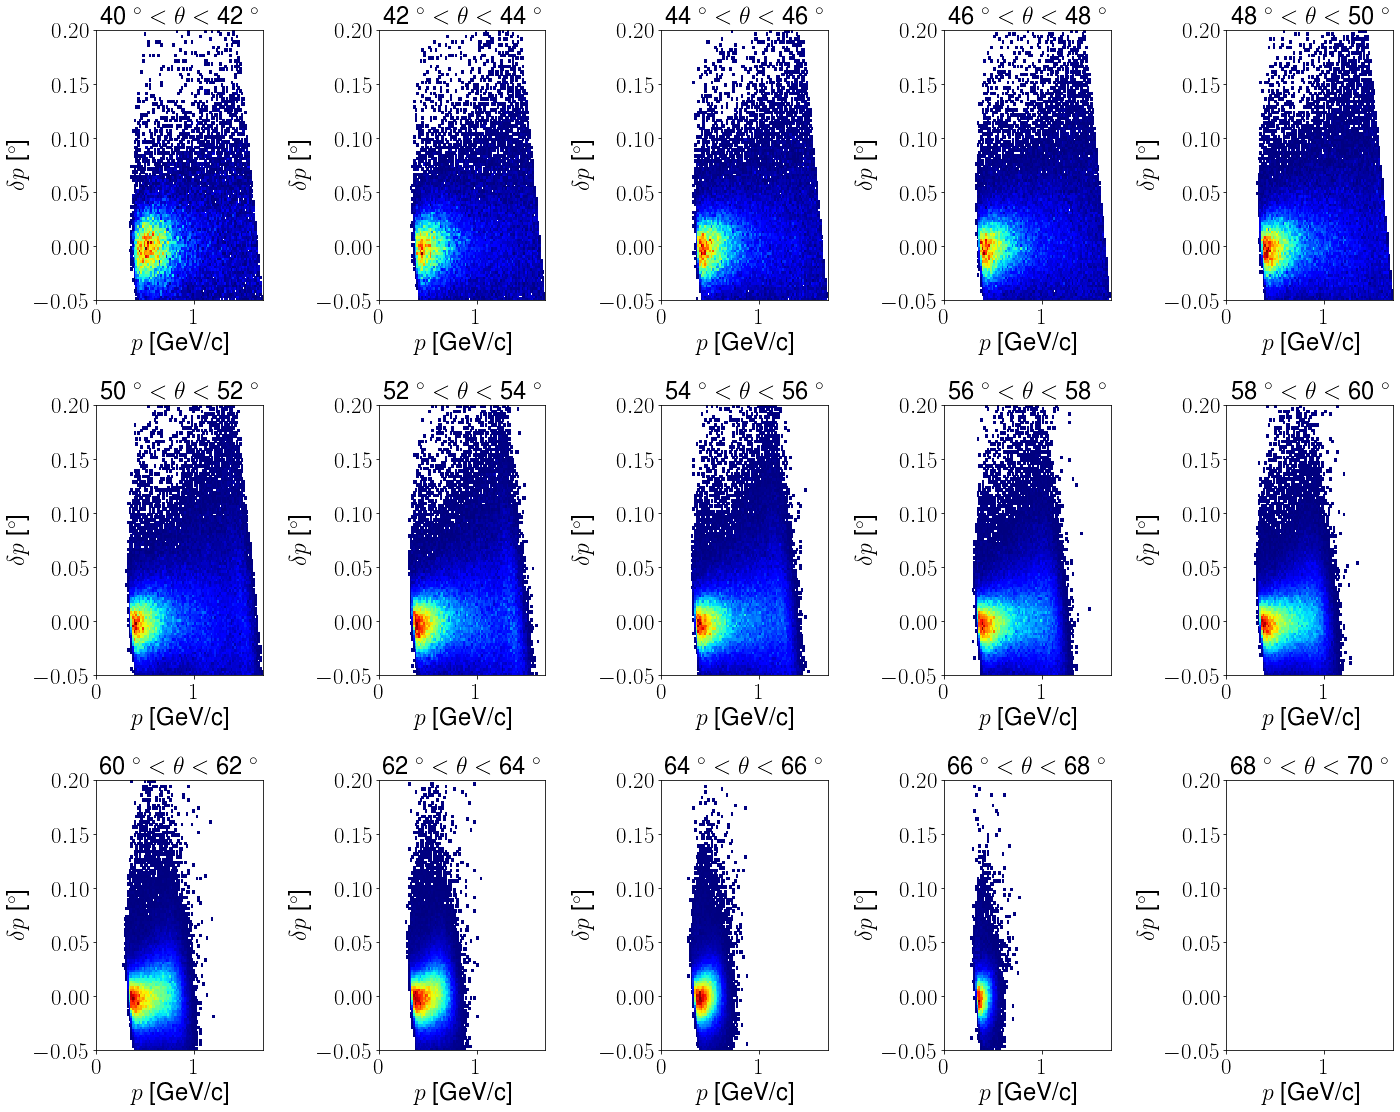

In [190]:
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (df_protonRec.Ptheta >= 2*(ind)+40) & (df_protonRec.Ptheta < 2*(ind+1)+40)
        axs[row, col].hist2d(df_protonRec.loc[thetaCond, "Pp"], df_protonRec.loc[thetaCond, "GenPp"] - df_protonRec.loc[thetaCond, "Pp"], bins = [np.linspace(0, 1.7, 101), np.linspace(-0.05, 0.2, 101)], cmap = cmap, cmin =1)
        param = params_p[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta<$ " + str(2*(ind+1)+40)+" "+degree)
plt.tight_layout()
plt.show()
# plt.savefig("correction_p_result.pdf")

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


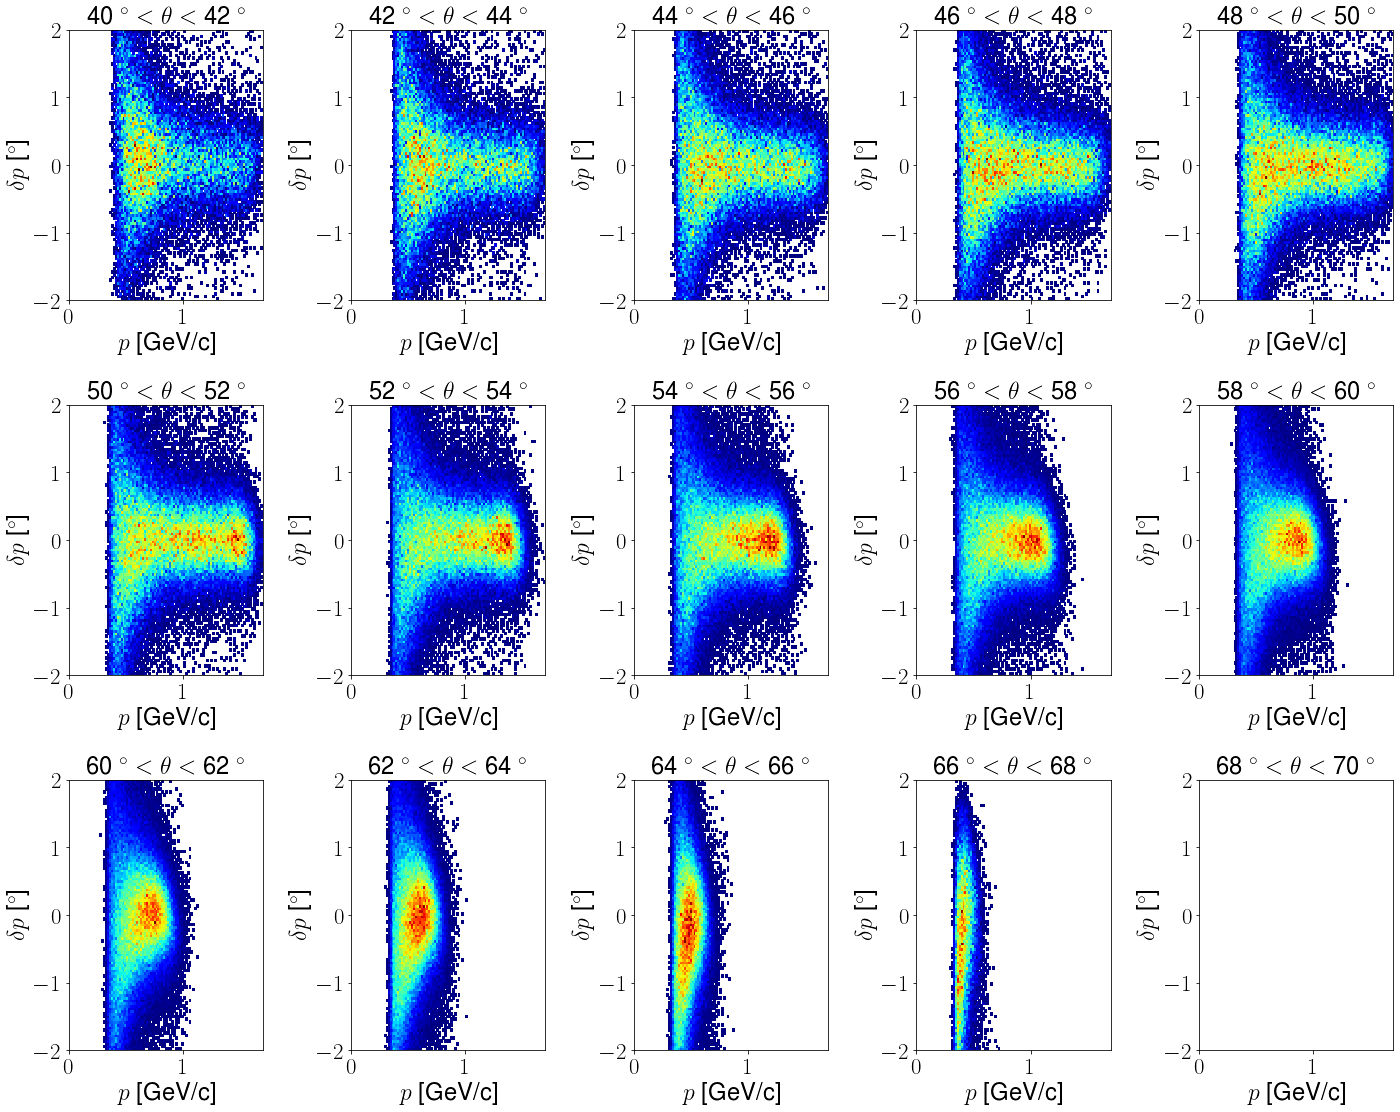

In [192]:
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (df_protonRec.Ptheta >= 2*(ind)+40) & (df_protonRec.Ptheta < 2*(ind+1)+40)
        axs[row, col].hist2d(df_protonRec.loc[thetaCond, "Pp"], df_protonRec.loc[thetaCond, "GenPtheta"] - df_protonRec.loc[thetaCond, "Ptheta"], bins = [np.linspace(0, 1.7, 101), np.linspace(-2, 2, 101)], cmap = cmap, cmin =1)
        param = params_p[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta<$ " + str(2*(ind+1)+40)+" "+degree)
plt.tight_layout()
plt.show()
# plt.savefig("correction_p_result.pdf")

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


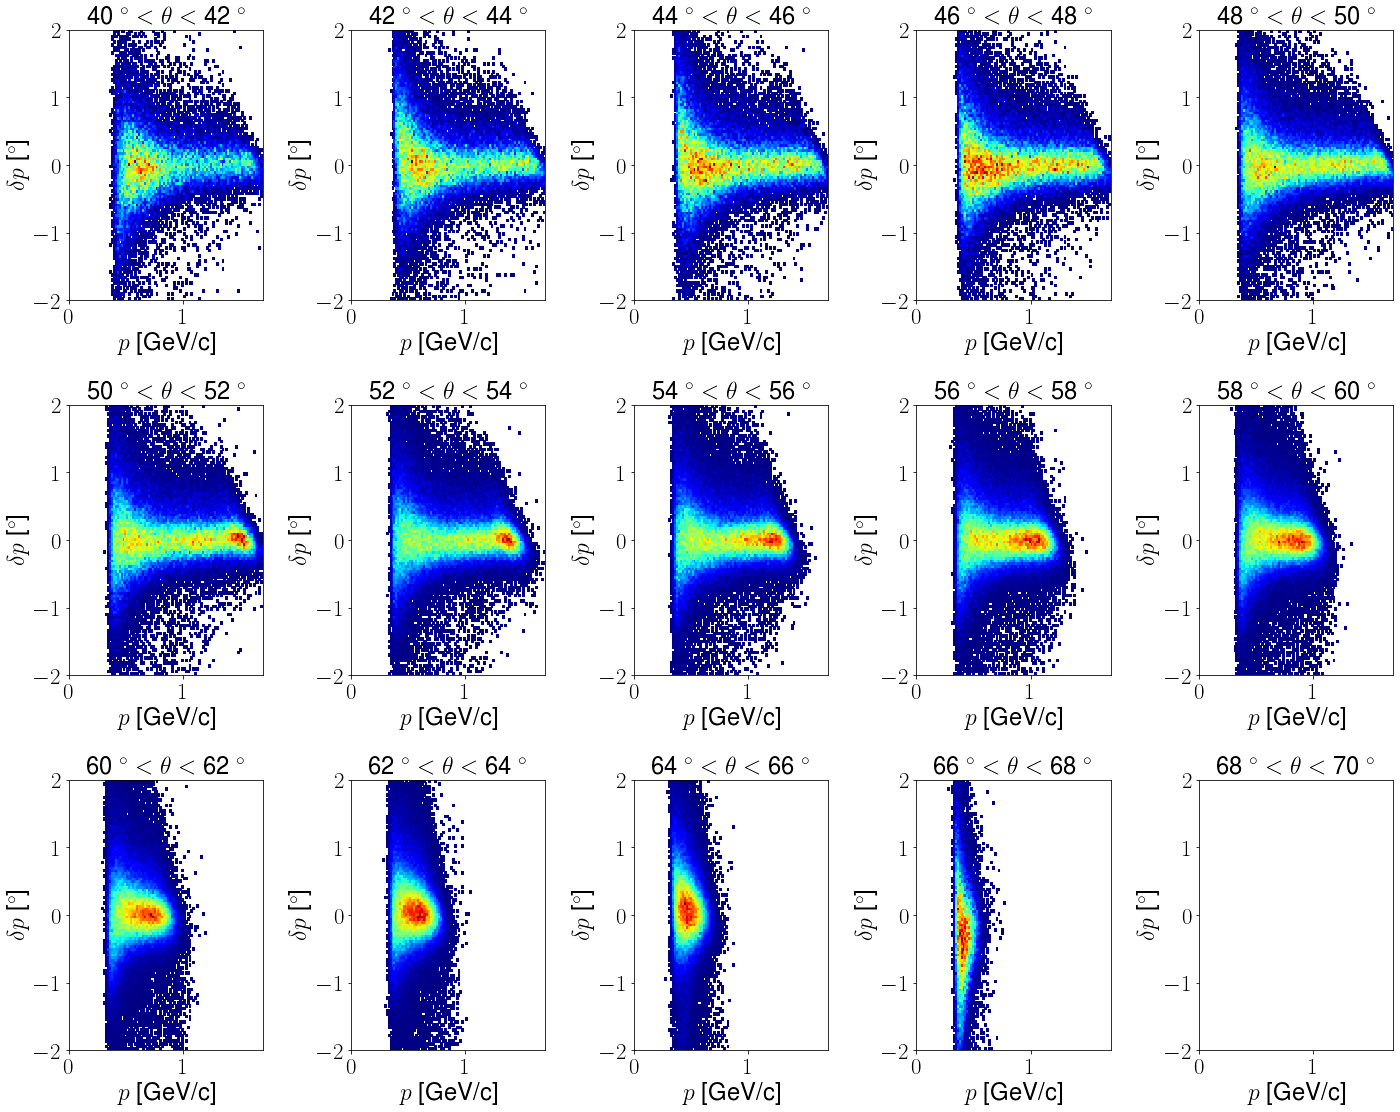

In [193]:
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (df_protonRec.Ptheta >= 2*(ind)+40) & (df_protonRec.Ptheta < 2*(ind+1)+40)
        axs[row, col].hist2d(df_protonRec.loc[thetaCond, "Pp"], df_protonRec.loc[thetaCond, "GenPphi"] - df_protonRec.loc[thetaCond, "Pphi"], bins = [np.linspace(0, 1.7, 101), np.linspace(-2, 2, 101)], cmap = cmap, cmin =1)
        param = params_p[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta<$ " + str(2*(ind+1)+40)+" "+degree)
plt.tight_layout()
plt.show()
# plt.savefig("correction_p_result.pdf")

## outbending

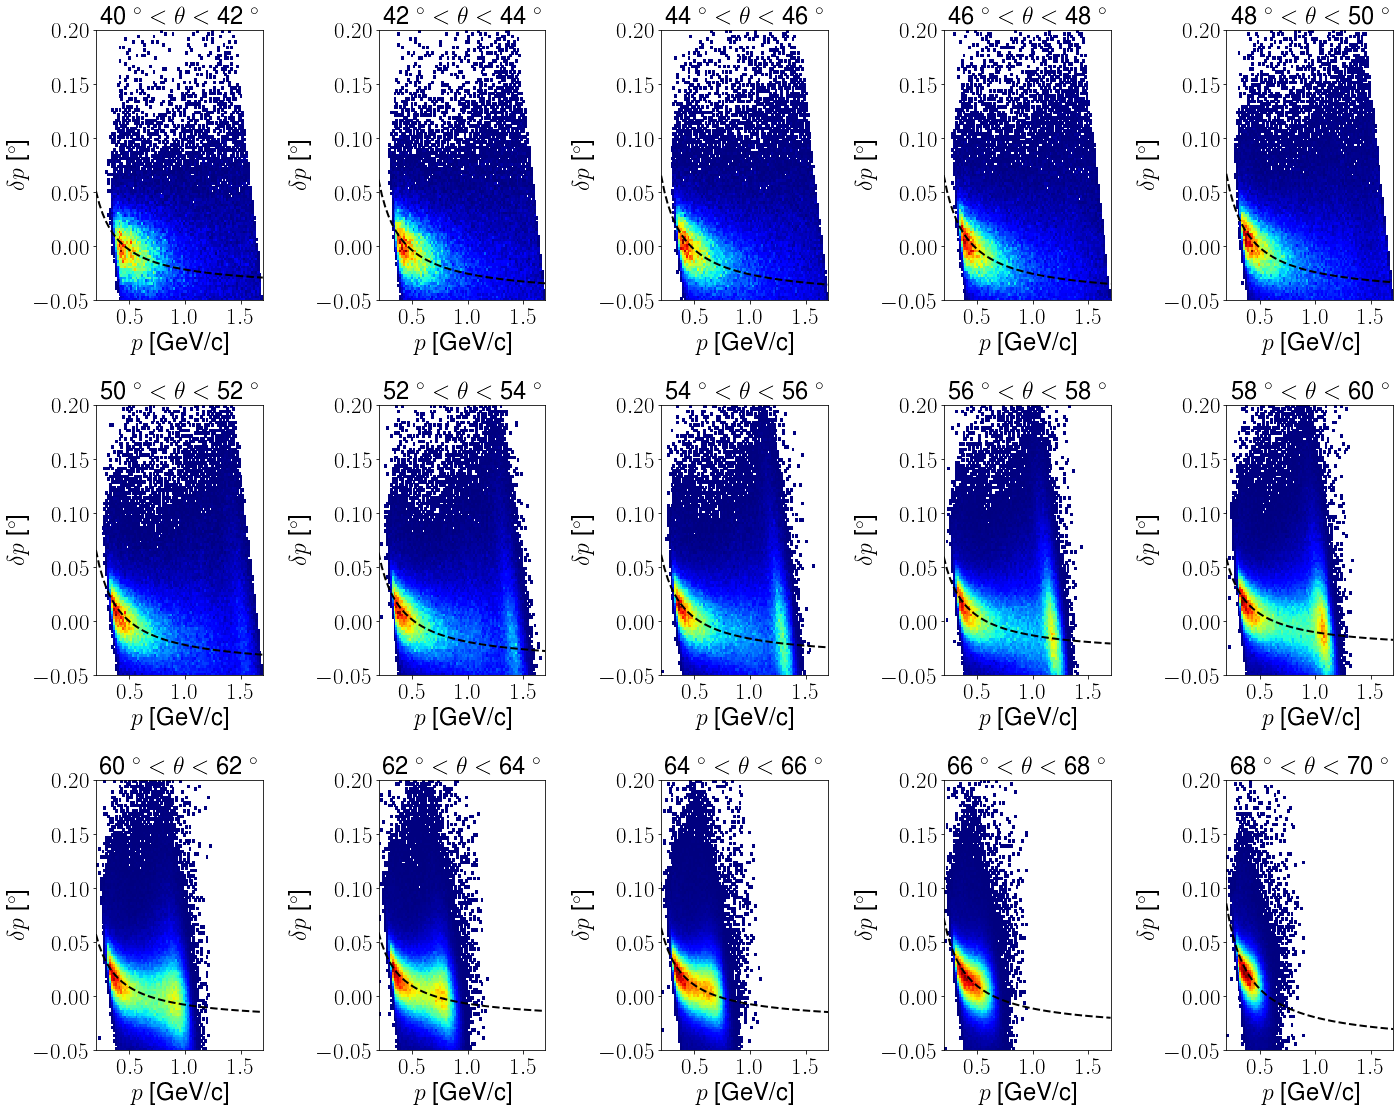

In [202]:
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingCD.Ptheta >= 2*(ind)+40) & (outbendingCD.Ptheta < 2*(ind+1)+40)
        axs[row, col].hist2d(outbendingCD.loc[thetaCond, "Pp"], outbendingCD.loc[thetaCond, "GenPp"] - outbendingCD.loc[thetaCond, "Pp"], bins = [np.linspace(0, 1.7, 101), np.linspace(-0.05, 0.2, 101)], cmap = cmap, cmin =1)
        param = params_p[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.2, 1.7, 51), correction(param, np.linspace(0.2, 1.7, 51)), color='k', linewidth=2, linestyle='--')
        axs[row, col].set_xlim(0.2, 1.7)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta<$ " + str(2*(ind+1)+40)+" "+degree)
plt.tight_layout()
plt.show()
# plt.savefig("correction_p_result.pdf")

In [199]:
params_p = []
uncertainties_p = []
# loss = []
for i in range(15):
#     if ind<3:
#     x0 = [-0.005,  0.001]
    x0 = res_lsq.x
#     else:
#         x0 = [-0.02097534,  0.03317596]

    #from previous fit
#     x0s = [[-0.00954028,  0.01301059], [-0.00707975,  0.01093971], [-0.00438814,  0.00959533], [-0.01717612,  0.02865886], [-0.02014798,  0.0338319 ], [-0.03188756,  0.04206616]]
#     x0 = x0s[ind//2]

#     x0s = [[-4.80389058e-05,  4.53222098e-03],
#            [-1.23041956e-03,  6.05807042e-03],
#            [-1.76384255e-03,  6.72228344e-03],
#            [-1.88736661e-03,  7.02802014e-03],
#            [-1.79354781e-03,  7.24121971e-03],
#            [-2.90571633e-03,  9.42541929e-03],
#            [-9.47461186e-03,  1.98311802e-02],
#            [-8.07962821e-03,  1.98069365e-02],
#            [-9.23283528e-03,  2.19080106e-02],
#            [-9.56769814e-03,  2.29519214e-02],
#            [-9.68958476e-03,  2.28616792e-02],
#            [-1.10693927e-02,  2.45928549e-02],
#            [-1.03538529e-02,  2.48101827e-02],
#            [-1.12320275e-02,  2.59453728e-02],
#            [-1.24223334e-02,  2.73036576e-02],
#            [-1.19610320e-02,  2.74316186e-02],
#            [-1.25053015e-02,  2.80233161e-02],
#            [-1.49314572e-02,  2.99888234e-02],
#            [-1.60389360e-02,  3.06035474e-02],
#            [-2.36705524e-02,  3.55724193e-02]]
#     x0 = x0s[ind]
    
    thetaCond = (outbendingCD.Ptheta >= 2*i+40) & (outbendingCD.Ptheta < 2*(i+1)+40)
    dfi = copy(outbendingCD.loc[thetaCond, ["Pp", "GenPp"]])
    dffit = copy(dfi[np.abs(dfi["GenPp"]-dfi["Pp"]-correction(x0, dfi["Pp"]))<0.05])
    for i in range (0, 10):
        res_lsq = least_squares(fun, x0, args=(dffit["Pp"], (dffit["GenPp"]-dffit["Pp"])))    
        dffit = copy(dfi[np.abs(dfi["GenPp"]-dfi["Pp"]-correction(res_lsq.x, dfi["Pp"]))<0.05])
        x0 = res_lsq.x
    
    params_p.append(res_lsq.x)
    
    # uncertainty
    # https://github.com/scipy/scipy/blob/2526df72e5d4ca8bad6e2f4b3cbdfbc33e805865/scipy/optimize/minpack.py#L739
    _, s, VT = np.linalg.svd(res_lsq.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(res_lsq.jac.shape) * s[0]
    s = s[s > threshold]
    VT = VT[:s.size]
    pcov = np.dot(VT.T / s**2, VT)
    s_sq = np.sum((dfi["GenPp"]-dfi["Pp"]-correction(res_lsq.x, dfi["Pp"]))**2) / (len(dfi) - len(x0))
    pcov = pcov * s_sq
    uncertainties_p.append(np.sqrt(np.diag(pcov)))

In [213]:
params_p = np.array(params_p)
consts_p = params_p[:, 0]
coeffs_p = params_p[:, 1]

uncertainties_p = np.array(uncertainties_p)
consts_uncertainties_p = uncertainties_p[:, 0]
coeffs_uncertainties_p = uncertainties_p[:, 1]

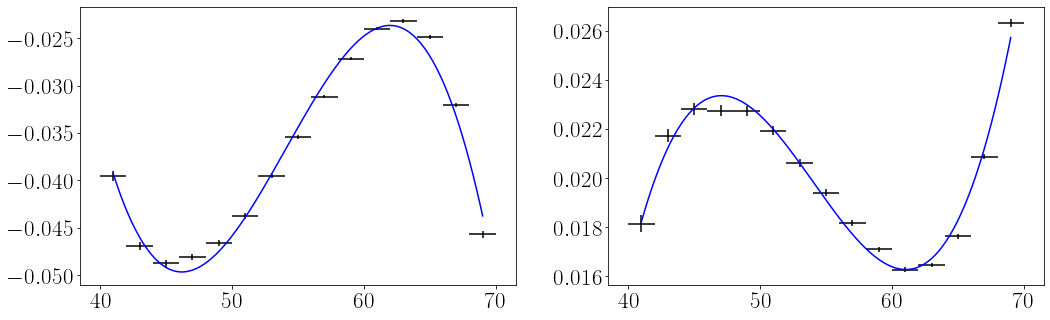

In [216]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].errorbar(np.linspace(0, 14, 15)*2+41, consts_p, xerr= 1, yerr = consts_uncertainties_p, color='k', linestyle = '')
ax[1].errorbar(np.linspace(0, 14, 15)*2+41, coeffs_p, xerr= 1, yerr = coeffs_uncertainties_p, color='k', linestyle = '')
ax[0].plot(np.linspace(0, 14, 201)*2+41, correction5(param1_p, np.linspace(0, 14, 201)*2+41), color = 'b')
# ax[0].plot(np.linspace(27, 40, 101), correction3(param3_p, np.linspace(26, 40, 101)), color = 'b')

ax[1].plot(np.linspace(0, 14, 201)*2+41, correction5(param2_p, np.linspace(0, 14, 201)*2+41), color = 'b')
# ax[1].plot(np.linspace(27, 40, 101), correction3(param4_p, np.linspace(26, 40, 101)), color = 'b')

plt.tight_layout()
plt.show()
# plt.savefig("correction_phi.pdf")

In [215]:
x = np.linspace(0, 14, 15)*2+41

res_lsq = least_squares(fun5, [0, 0, 0, 0], args=(x, consts_p))    
param1_p = res_lsq.x
res_lsq = least_squares(fun5, [0, 0, 0, 0], args=(x, coeffs_p))    
param2_p = res_lsq.x

In [217]:
print(param1_p, "\n", param2_p)

[ 1.92657376e+00 -1.13836734e-01  2.15038526e-03 -1.32525053e-05] 
 [-7.55650043e-01  4.45538936e-02 -8.38241864e-04  5.16887255e-06]


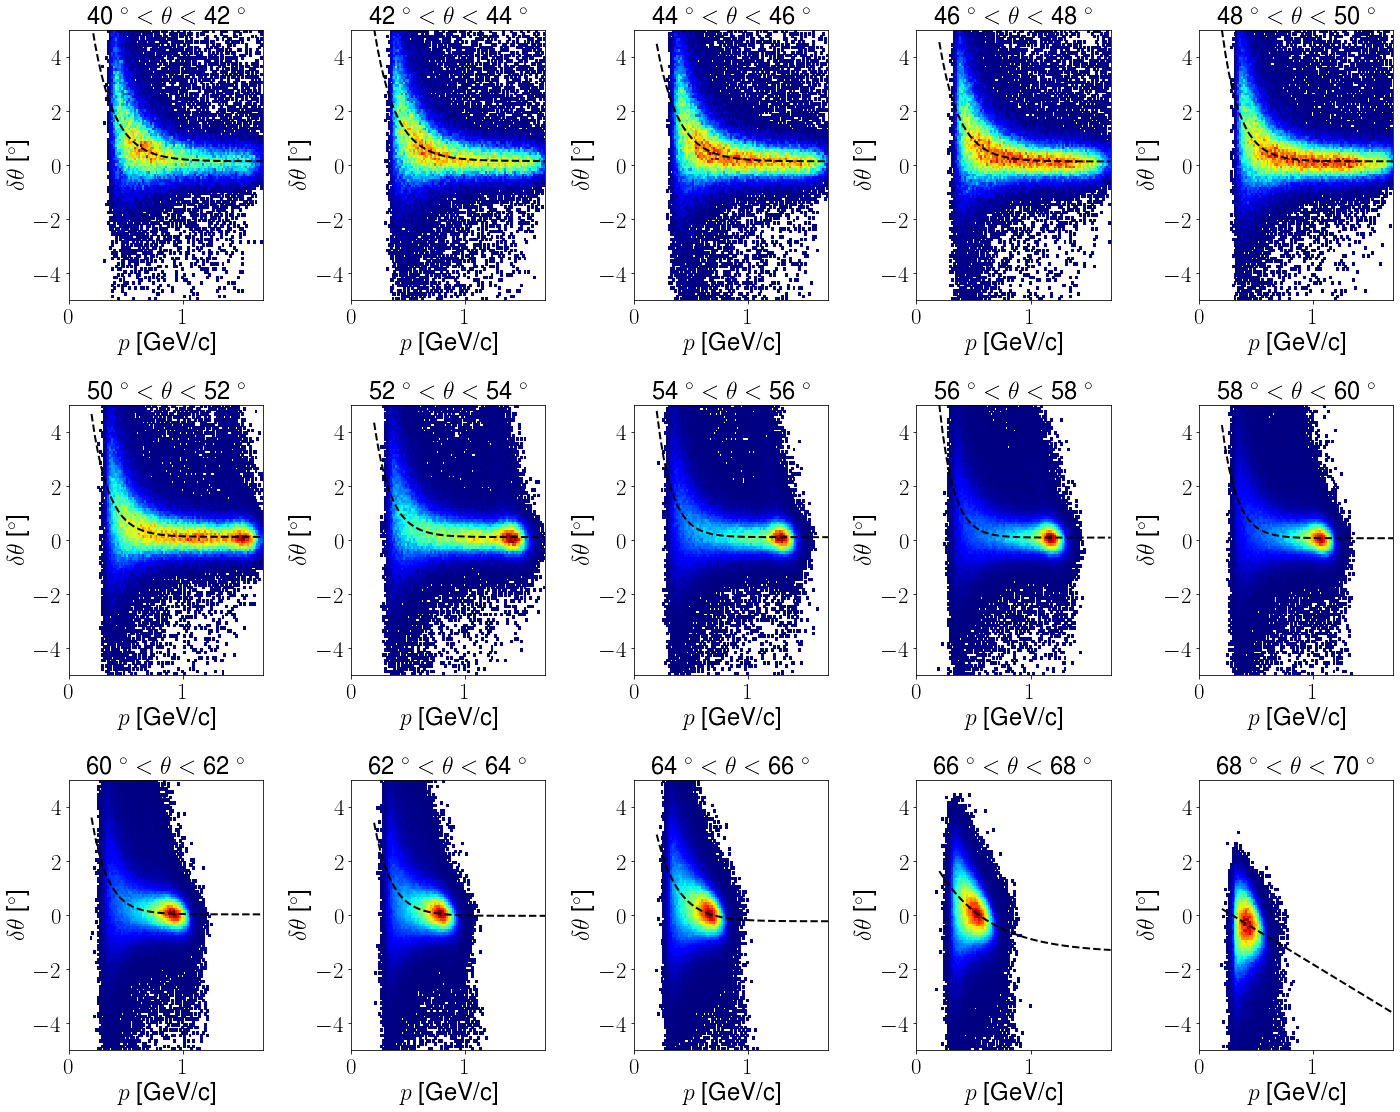

In [285]:
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingCD.Ptheta >= 2*(ind)+40) & (outbendingCD.Ptheta < 2*(ind+1)+40)
        axs[row, col].hist2d(outbendingCD.loc[thetaCond, "Pp"], outbendingCD.loc[thetaCond, "GenPtheta"] - outbendingCD.loc[thetaCond, "Ptheta"], bins = [np.linspace(0, 1.7, 101), np.linspace(-5, 5, 101)], cmap = cmap, cmin =1)
        param = params_theta[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.2, 1.7, 51), correction4(param, np.linspace(0.2, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta<$ " + str(2*(ind+1)+40)+" "+degree)
plt.tight_layout()
plt.show()
# plt.savefig("correction_p_result.pdf")

In [275]:
params_theta = []
uncertainties_theta = []
# loss = []
for ind in range(15):
    x0 = [-0.16080697, 8.59241295, -3.85634824]
#     x0 = res_lsq.x
    thetaCond = (outbendingCD.Ptheta >= 2*ind+40) & (outbendingCD.Ptheta < 2*ind+42)
    dfi = copy(outbendingCD.loc[thetaCond, ["Pp", "GenPtheta", "Ptheta"]])
    dffit = copy(dfi[np.abs(dfi["GenPtheta"]-dfi["Ptheta"]-correction4(x0, dfi["Pp"]))<.5])
    for i in range (0, 10):
        res_lsq = least_squares(fun4, x0, args=(dffit["Pp"], (dffit["GenPtheta"]-dffit["Ptheta"])))    
        dffit = copy(dfi[np.abs(dfi["GenPtheta"]-dfi["Ptheta"]-correction4(res_lsq.x, dfi["Pp"]))<1])
        x0 = res_lsq.x
    
    params_theta.append(res_lsq.x)
    
    # uncertainty
    # https://github.com/scipy/scipy/blob/2526df72e5d4ca8bad6e2f4b3cbdfbc33e805865/scipy/optimize/minpack.py#L739
    _, s, VT = np.linalg.svd(res_lsq.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(res_lsq.jac.shape) * s[0]
    s = s[s > threshold]
    VT = VT[:s.size]
    pcov = np.dot(VT.T / s**2, VT)
    s_sq = np.sum((dfi["GenPtheta"]-dfi["Ptheta"]-correction4(res_lsq.x, dfi["Pp"]))**2) / (len(dfi) - len(x0))
    pcov = pcov * s_sq
    uncertainties_theta.append(np.sqrt(np.diag(pcov)))

# params_theta[0] = params_theta[3]
# params_theta[1] = params_theta[3]
# params_theta[2] = params_theta[3]

# uncertainties_theta[0] = uncertainties_theta[3]
# uncertainties_theta[1] = uncertainties_theta[3]
# uncertainties_theta[2] = uncertainties_theta[3]

In [276]:
params_theta = np.array(params_theta)
consts_theta = params_theta[:, 0]
coeffs_theta = params_theta[:, 1]
coeffs2_theta = params_theta[:, 2]

uncertainties_theta = np.array(uncertainties_theta)
consts_uncertainties_theta = uncertainties_theta[:, 0]
coeffs_uncertainties_theta = uncertainties_theta[:, 1]
coeffs2_uncertainties_theta = uncertainties_theta[:, 2]

In [277]:
x = np.linspace(0, 12, 13)*2+41

res_lsq = least_squares(fun6, [0, 0, 0, 0, 0], args=(x, consts_theta[:-2]))    
param1_theta = res_lsq.x
res_lsq = least_squares(fun6, [0, 0, 0, 0, 0], args=(x, coeffs_theta[:-2]))    
param2_theta = res_lsq.x
res_lsq = least_squares(fun5, [0, 0, 0, 0], args=(x, coeffs2_theta[:-2]))    
param3_theta = res_lsq.x

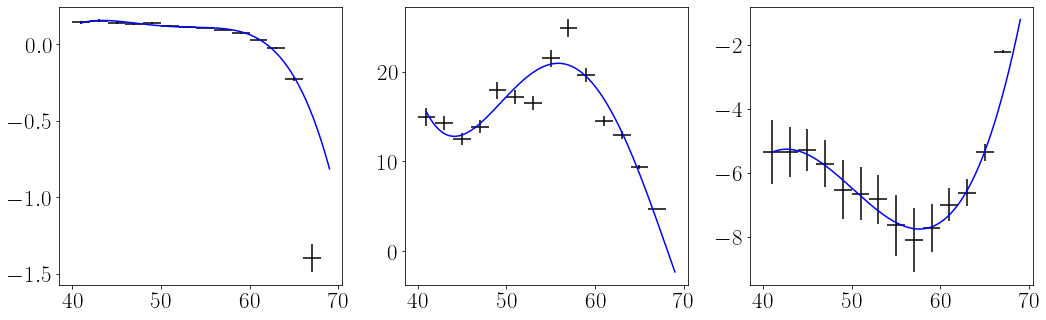

In [286]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
# ax[0].errorbar(np.linspace(0, 12, 13)*2+41, consts_theta[:-2], xerr= 1, yerr = consts_uncertainties_theta[:-2], color='k', linestyle = '')
# ax[1].errorbar(np.linspace(0, 12, 13)*2+41, coeffs_theta[:-2], xerr= 1, yerr = coeffs_uncertainties_theta[:-2], color='k', linestyle = '')
# ax[2].errorbar(np.linspace(0, 12, 13)*2+41, coeffs2_theta[:-2], xerr= 1, yerr = coeffs_uncertainties_theta[:-2], color='k', linestyle = '')
ax[0].errorbar(np.linspace(0, 13, 14)*2+41, consts_theta[:-1], xerr= 1, yerr = consts_uncertainties_theta[:-1], color='k', linestyle = '')
ax[1].errorbar(np.linspace(0, 13, 14)*2+41, coeffs_theta[:-1], xerr= 1, yerr = coeffs_uncertainties_theta[:-1], color='k', linestyle = '')
ax[2].errorbar(np.linspace(0, 13, 14)*2+41, coeffs2_theta[:-1], xerr= 1, yerr = coeffs_uncertainties_theta[:-1], color='k', linestyle = '')

ax[0].plot(np.linspace(0, 14, 201)*2+41, correction6(param1_theta, np.linspace(0, 14, 201)*2+41), color = 'b')

ax[1].plot(np.linspace(0, 14, 201)*2+41, correction6(param2_theta, np.linspace(0, 14, 201)*2+41), color = 'b')
# ax[1].plot(np.linspace(27, 40, 101), correction3(param4_theta, np.linspace(26, 40, 101)), color = 'b')

ax[2].plot(np.linspace(0, 14, 201)*2+41, correction5(param3_theta, np.linspace(0, 14, 201)*2+41), color = 'b')

plt.tight_layout()
plt.show()
# plt.savefig("correction_thetahi.pdf")

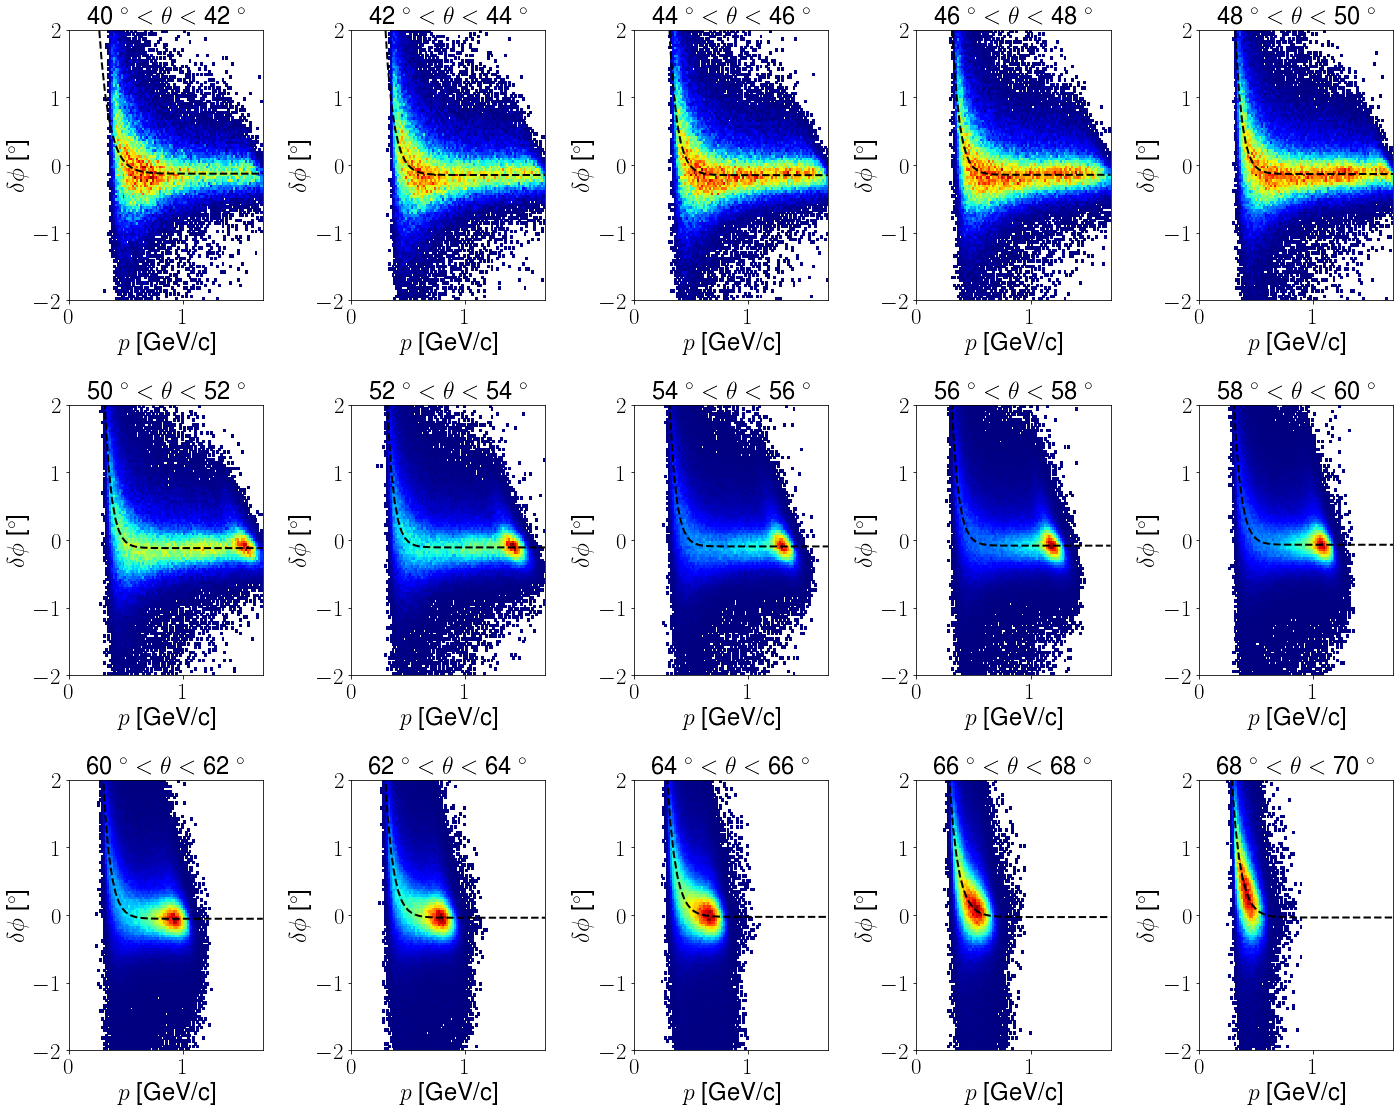

In [243]:
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingCD.Ptheta >= 2*(ind)+40) & (outbendingCD.Ptheta < 2*(ind+1)+40)
        axs[row, col].hist2d(outbendingCD.loc[thetaCond, "Pp"], outbendingCD.loc[thetaCond, "GenPphi"] - outbendingCD.loc[thetaCond, "Pphi"], bins = [np.linspace(0, 1.7, 101), np.linspace(-2, 2, 101)], cmap = cmap, cmin =1)
        param = params_phi[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.2, 1.7, 51), correction4(param, np.linspace(0.2, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta<$ " + str(2*(ind+1)+40)+" "+degree)
plt.tight_layout()
plt.show()
# plt.savefig("correction_p_result.pdf")

In [242]:
params_phi = []
uncertainties_phi = []
# loss = []
for ind in range(15):
    
    x0 = res_lsq.x
#     x0 = [-0.2, 50, -15]

    thetaCond = (outbendingCD.Ptheta >= 2*ind+40) & (outbendingCD.Ptheta < 2*ind+42)
    dfi = copy(outbendingCD.loc[thetaCond, ["Pp", "GenPphi", "Pphi"]])
    dffit = copy(dfi[np.abs(dfi["GenPphi"]-dfi["Pphi"]-correction4(x0, dfi["Pp"]))<.3])
    for i in range (0, 5):
        res_lsq = least_squares(fun4, x0, args=(dffit["Pp"], (dffit["GenPphi"]-dffit["Pphi"])))    
        dffit = copy(dfi[np.abs(dfi["GenPphi"]-dfi["Pphi"]-correction4(res_lsq.x, dfi["Pp"]))<.3])
        x0 = res_lsq.x
    
    params_phi.append(res_lsq.x)
    
    # uncertainty
    # https://github.com/scipy/scipy/blob/2526df72e5d4ca8bad6e2f4b3cbdfbc33e805865/scipy/optimize/minpack.py#L739
    _, s, VT = np.linalg.svd(res_lsq.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(res_lsq.jac.shape) * s[0]
    s = s[s > threshold]
    VT = VT[:s.size]
    pcov = np.dot(VT.T / s**2, VT)
    s_sq = np.sum((dffit["GenPphi"]-dffit["Pphi"]-correction4(res_lsq.x, dfi["Pp"]))**2) / (len(dffit) - len(x0))
    pcov = pcov * s_sq
    uncertainties_phi.append(np.sqrt(np.diag(pcov)))

# params_phi[0] = params_phi[3]
# params_phi[1] = params_phi[3]
# params_phi[2] = params_phi[3]

# uncertainties_phi[0] = uncertainties_phi[3]
# uncertainties_phi[1] = uncertainties_phi[3]
# uncertainties_phi[2] = uncertainties_phi[3]

In [244]:
params_phi = np.array(params_phi)
consts_phi = params_phi[:, 0]
coeffs_phi = params_phi[:, 1]
coeffs2_phi = params_phi[:, 2]

uncertainties_phi = np.array(uncertainties_phi)
consts_uncertainties_phi = uncertainties_phi[:, 0]
coeffs_uncertainties_phi = uncertainties_phi[:, 1]
coeffs2_uncertainties_phi = uncertainties_phi[:, 2]

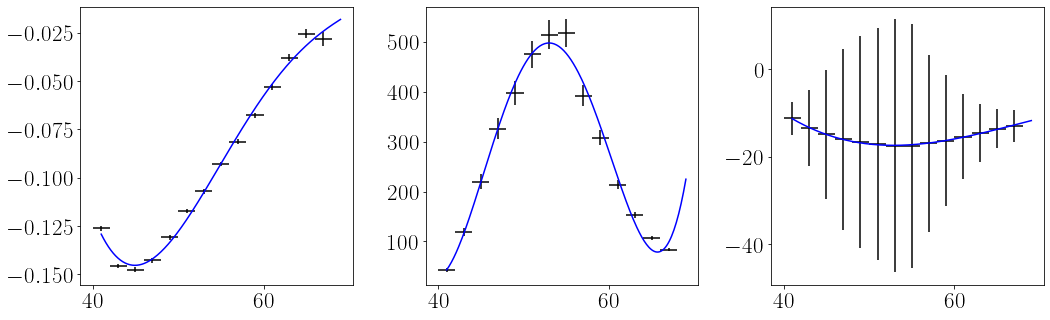

In [253]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
# ax[0].errorbar(np.linspace(0, 12, 13)*2+41, consts_phi[:-2], xerr= 1, yerr = consts_uncertainties_phi[:-2], color='k', linestyle = '')
# ax[1].errorbar(np.linspace(0, 12, 13)*2+41, coeffs_phi[:-2], xerr= 1, yerr = coeffs_uncertainties_phi[:-2], color='k', linestyle = '')
# ax[2].errorbar(np.linspace(0, 12, 13)*2+41, coeffs2_phi[:-2], xerr= 1, yerr = coeffs_uncertainties_phi[:-2], color='k', linestyle = '')
ax[0].errorbar(np.linspace(0, 13, 14)*2+41, consts_phi[:-1], xerr= 1, yerr = consts_uncertainties_phi[:-1], color='k', linestyle = '')
ax[1].errorbar(np.linspace(0, 13, 14)*2+41, coeffs_phi[:-1], xerr= 1, yerr = coeffs_uncertainties_phi[:-1], color='k', linestyle = '')
ax[2].errorbar(np.linspace(0, 13, 14)*2+41, coeffs2_phi[:-1], xerr= 1, yerr = coeffs_uncertainties_phi[:-1], color='k', linestyle = '')

ax[0].plot(np.linspace(0, 14, 201)*2+41, correction6(param1_phi, np.linspace(0, 14, 201)*2+41), color = 'b')

ax[1].plot(np.linspace(0, 14, 201)*2+41, correction6(param2_phi, np.linspace(0, 14, 201)*2+41), color = 'b')
# ax[1].plot(np.linspace(27, 40, 101), correction3(param4_phi, np.linspace(26, 40, 101)), color = 'b')

ax[2].plot(np.linspace(0, 14, 201)*2+41, correction5(param3_phi, np.linspace(0, 14, 201)*2+41), color = 'b')

plt.tight_layout()
plt.show()
# plt.savefig("correction_phihi.pdf")

In [246]:
params_phi = np.array(params_phi)
consts_phi = params_phi[:, 0]
coeffs_phi = params_phi[:, 1]
coeffs2_phi = params_phi[:, 2]

uncertainties_phi = np.array(uncertainties_phi)
consts_uncertainties_phi = uncertainties_phi[:, 0]
coeffs_uncertainties_phi = uncertainties_phi[:, 1]
coeffs2_uncertainties_phi = uncertainties_phi[:, 2]

In [251]:
x = np.linspace(0, 12, 13)*2+41
x2 = np.linspace(0, 13, 14)*2+41
res_lsq = least_squares(fun6, [0, 0, 0, 0, 0], args=(x2, consts_phi[:-1]))    
param1_phi = res_lsq.x
res_lsq = least_squares(fun6, [0, 0, 0, 0, 0], args=(x2, coeffs_phi[:-1]))    
param2_phi = res_lsq.x
res_lsq = least_squares(fun5, [0, 0, 0, 0], args=(x2, coeffs2_phi[:-1]))    
param3_phi = res_lsq.x

In [287]:
print(param1_p, "\n", param2_p, "\n")
print(param1_theta, "\n", param2_theta, "\n", param3_theta, "\n")
print(param1_phi, "\n", param2_phi, "\n", param3_phi, "\n")

[ 1.92657376e+00 -1.13836734e-01  2.15038526e-03 -1.32525053e-05] 
 [-7.55650043e-01  4.45538936e-02 -8.38241864e-04  5.16887255e-06] 

[-5.79024055e+01  4.67197531e+00 -1.40156897e-01  1.85853057e-03
 -9.19989908e-06] 
 [ 2.99700765e+03 -2.18027982e+02  5.84757503e+00 -6.80409195e-02
  2.89244618e-04] 
 [-1.82237904e+02  1.10153549e+01 -2.24699931e-01  1.49390960e-03] 

[ 7.58761670e+00 -5.28224578e-01  1.31580117e-02 -1.41738951e-04
  5.62884363e-07] 
 [ 1.07644097e+05 -8.67994639e+03  2.57187193e+02 -3.31379317e+00
  1.56896621e-02] 
 [ 1.92263184e+02 -1.00870704e+01  1.56575252e-01 -7.71489734e-04] 



In [291]:
df_protonRec = copy(outbendingCD.loc[:, ["Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi","Psector"]])
const_CD = 1.92657376 - 0.113836734*df_protonRec.Ptheta + 0.00215038526*df_protonRec.Ptheta**2 - 1.32525053 * 10**(-5)*df_protonRec.Ptheta**3
coeff_CD = -0.755650043 + 0.0445538936*df_protonRec.Ptheta - 8.38241864*10**(-4)*df_protonRec.Ptheta*df_protonRec.Ptheta + 5.16887255 * 10**(-6) * df_protonRec.Ptheta**3

CorrectedPp_CD = const_CD + coeff_CD/df_protonRec.loc[:, "Pp"] + df_protonRec.loc[:, "Pp"]

const_CD = -5.79024055*10 + 4.67197531 * df_protonRec.Ptheta - 0.140156897 * df_protonRec.Ptheta**2 + 1.85853057 * 10**(-3) * df_protonRec.Ptheta**3 - 9.19989908 * 10**(-6) * df_protonRec.Ptheta**4
coeff_CD = 2.99700765*1000 - 2.18027982 * 10**2 * df_protonRec.Ptheta + 5.84757503 * df_protonRec.Ptheta**2 - 6.80409195 * 0.01 * df_protonRec.Ptheta**3 + 2.89244618 * 0.0001 * df_protonRec.Ptheta**4
coeff2_CD = -1.82237904*100 + 1.10153549 * 10 * df_protonRec.Ptheta - 2.24699931*0.1 * df_protonRec.Ptheta**2 + 1.49390960*0.001*df_protonRec.Ptheta**3

CorrectedPtheta_CD = const_CD + coeff_CD*np.exp(coeff2_CD*df_protonRec.loc[:, "Pp"]) + df_protonRec.loc[:, "Ptheta"]

const_CD = 7.58761670 - 5.28224578*0.1 * df_protonRec.Ptheta +  1.31580117 * 0.01 * df_protonRec.Ptheta**2 -1.41738951*10**(-4) * df_protonRec.Ptheta**3 + 5.62884363*10**(-7) * df_protonRec.Ptheta**4
coeff_CD = 1.07644097*10**(5) - 8.67994639*10**(3) * df_protonRec.Ptheta + 2.57187193*10**(2) * df_protonRec.Ptheta**2 - 3.31379317 * df_protonRec.Ptheta**3 + 1.56896621*10**(-2) * df_protonRec.Ptheta**4
coeff2_CD =  1.92263184*10**(2) -1.00870704 * 10 * df_protonRec.Ptheta + 1.56575252*10**(-1) * df_protonRec.Ptheta**2 -7.71489734*10**(-4) * df_protonRec.Ptheta**3
CorrectedPphi_CD = const_CD + coeff_CD*np.exp(coeff2_CD*df_protonRec.loc[:, "Pp"]) + df_protonRec.loc[:, "Pphi"]

df_protonRec.loc[df_protonRec["Psector"]>7, "Pp"] = CorrectedPp_CD
df_protonRec.loc[df_protonRec["Psector"]>7, "Ptheta"] = CorrectedPtheta_CD
df_protonRec.loc[df_protonRec["Psector"]>7, "Pphi"] = CorrectedPphi_CD


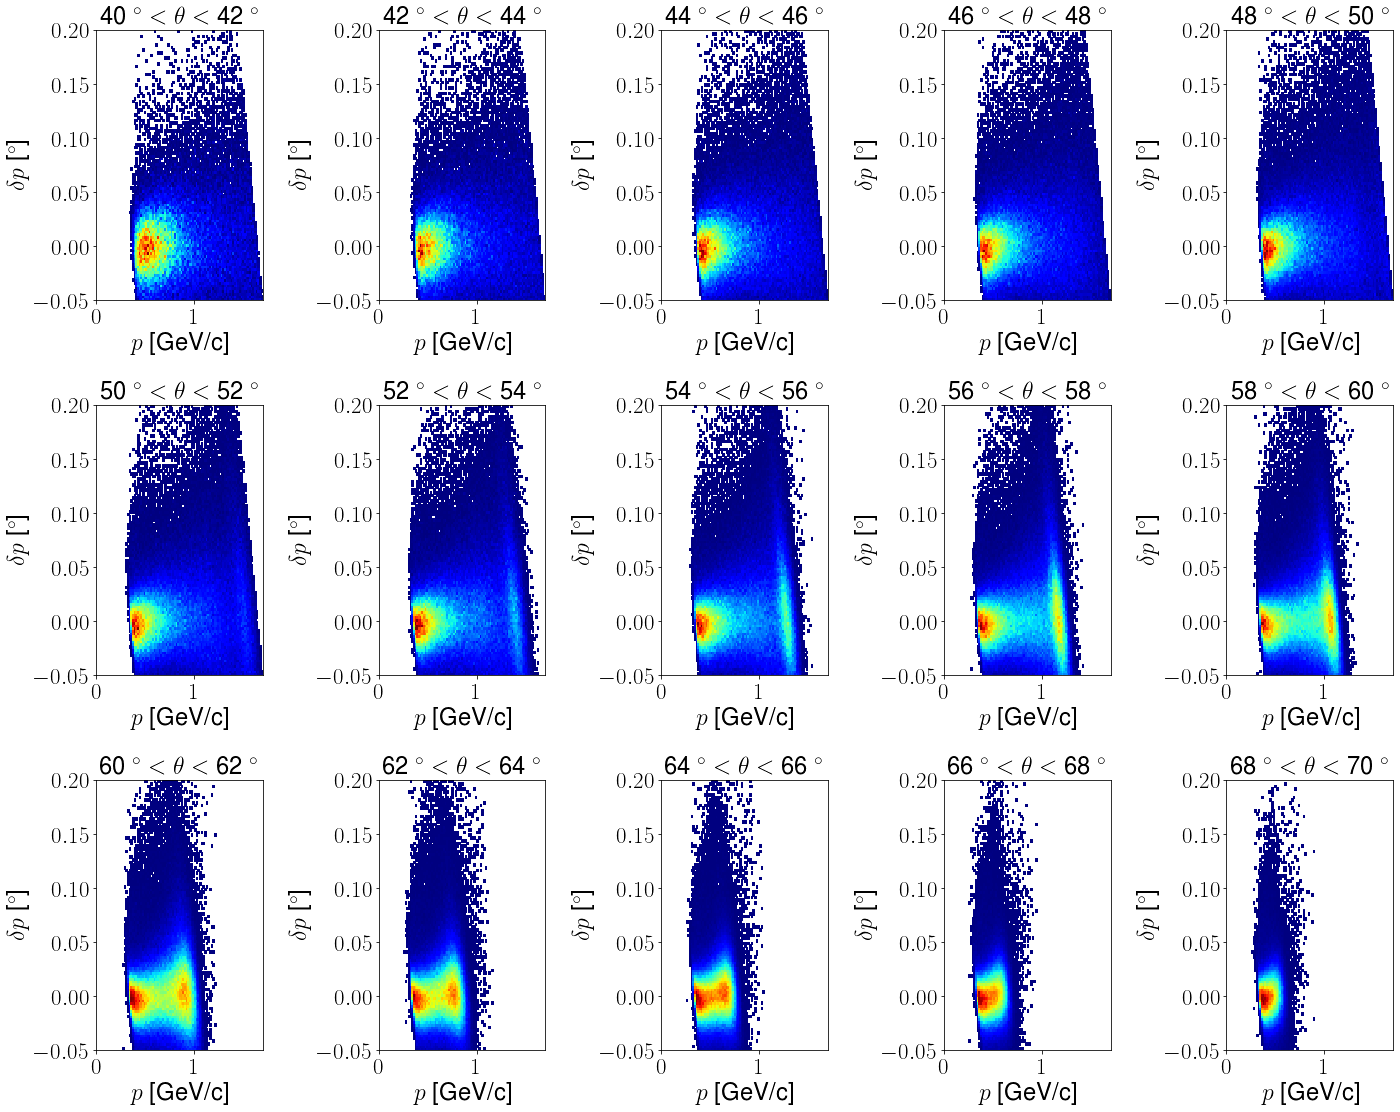

In [259]:
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (df_protonRec.Ptheta >= 2*(ind)+40) & (df_protonRec.Ptheta < 2*(ind+1)+40)
        axs[row, col].hist2d(df_protonRec.loc[thetaCond, "Pp"], df_protonRec.loc[thetaCond, "GenPp"] - df_protonRec.loc[thetaCond, "Pp"], bins = [np.linspace(0, 1.7, 101), np.linspace(-0.05, 0.2, 101)], cmap = cmap, cmin =1)
        param = params_p[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta<$ " + str(2*(ind+1)+40)+" "+degree)
plt.tight_layout()
plt.show()
# plt.savefig("correction_p_result.pdf")

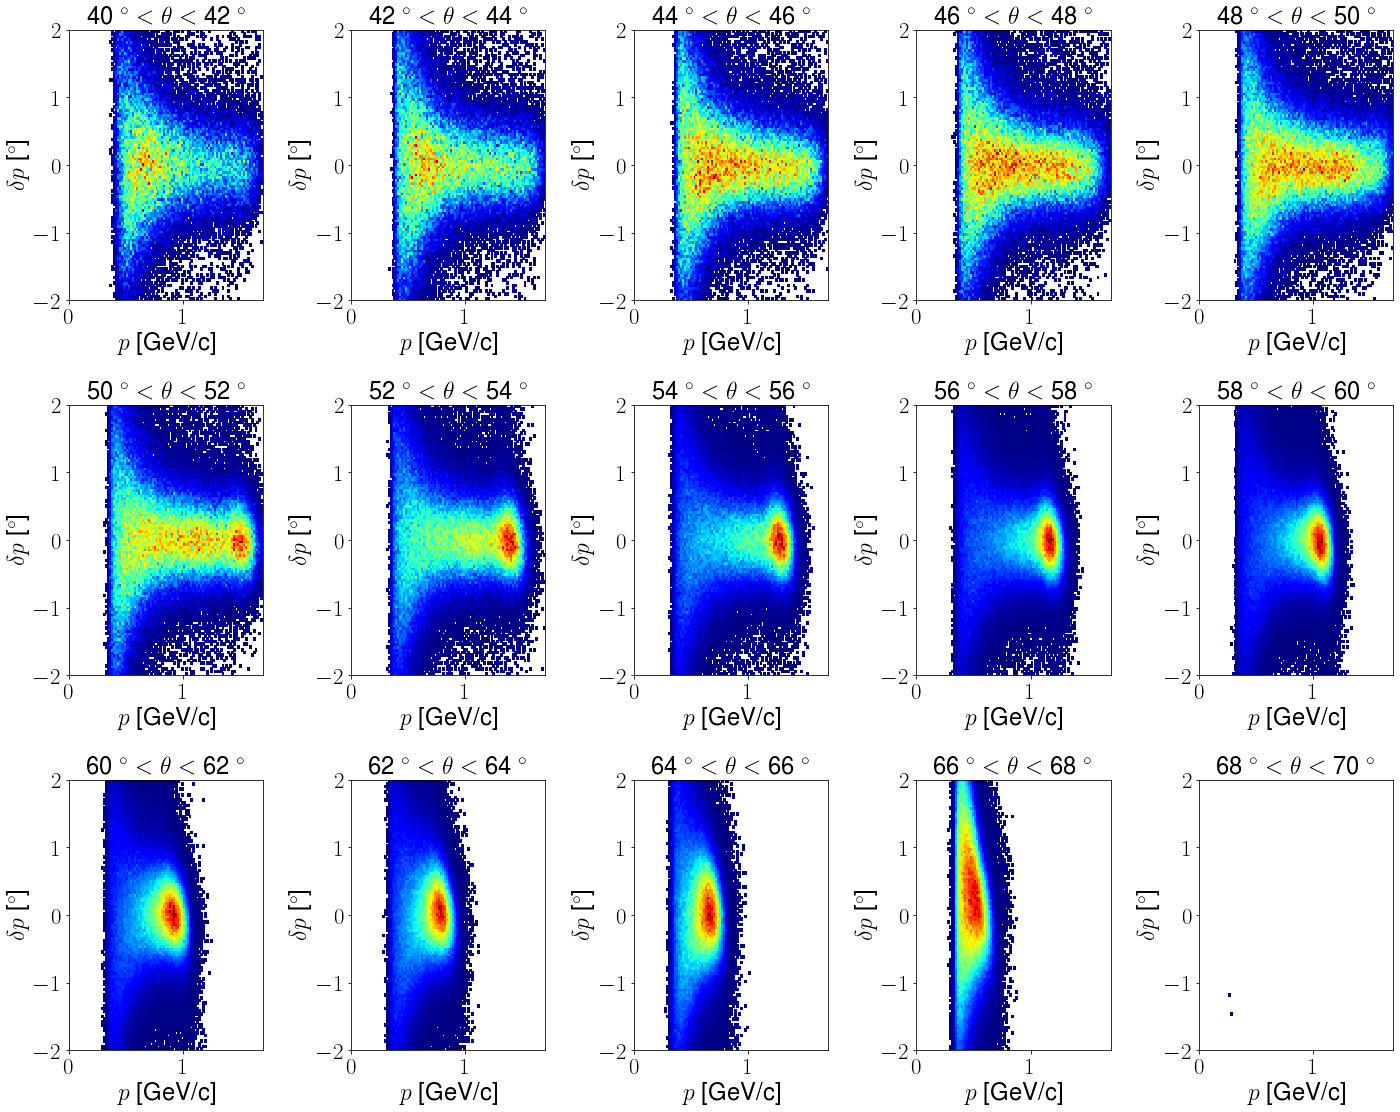

In [289]:
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (df_protonRec.Ptheta >= 2*(ind)+40) & (df_protonRec.Ptheta < 2*(ind+1)+40)
        axs[row, col].hist2d(df_protonRec.loc[thetaCond, "Pp"], df_protonRec.loc[thetaCond, "GenPtheta"] - df_protonRec.loc[thetaCond, "Ptheta"], bins = [np.linspace(0, 1.7, 101), np.linspace(-2, 2, 101)], cmap = cmap, cmin =1)
        param = params_p[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta<$ " + str(2*(ind+1)+40)+" "+degree)
plt.tight_layout()
plt.show()
# plt.savefig("correction_p_result.pdf")

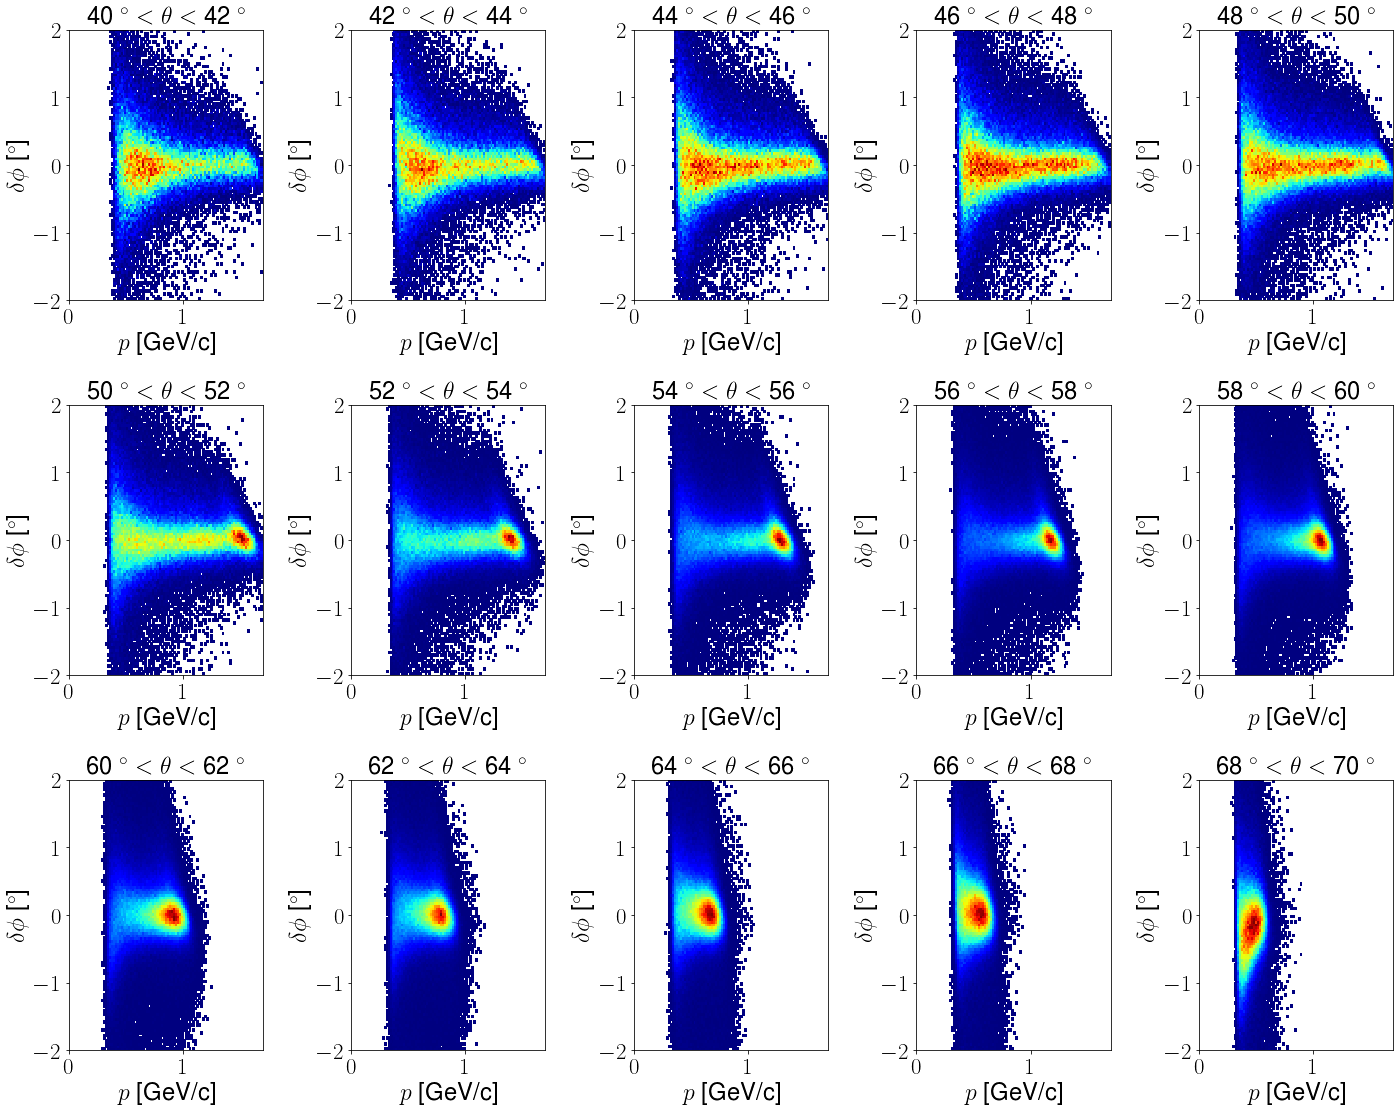

In [264]:
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (df_protonRec.Ptheta >= 2*(ind)+40) & (df_protonRec.Ptheta < 2*(ind+1)+40)
        axs[row, col].hist2d(df_protonRec.loc[thetaCond, "Pp"], df_protonRec.loc[thetaCond, "GenPphi"] - df_protonRec.loc[thetaCond, "Pphi"], bins = [np.linspace(0, 1.7, 101), np.linspace(-2, 2, 101)], cmap = cmap, cmin =1)
        param = params_p[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta<$ " + str(2*(ind+1)+40)+" "+degree)
plt.tight_layout()
plt.show()
# plt.savefig("correction_p_result.pdf")

<AxesSubplot:>

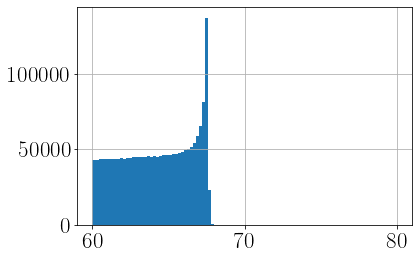

In [295]:
df_protonRec.Ptheta.hist(bins = np.linspace(60,80, 101))

In [300]:
inbendingFD = inbending[inbending.Psector<7]
outbendingFD = outbending[outbending.Psector<7]

<AxesSubplot:>

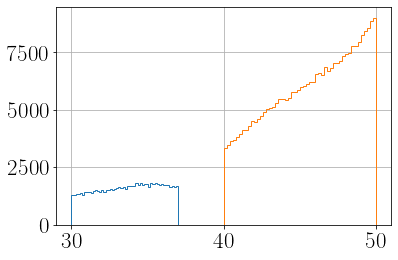

In [314]:
inbendingFD.Ptheta.hist(bins = np.linspace(30,37, 51), histtype = 'step')
inbendingCD.Ptheta.hist(bins = np.linspace(40,50, 51), histtype = 'step')

<AxesSubplot:>

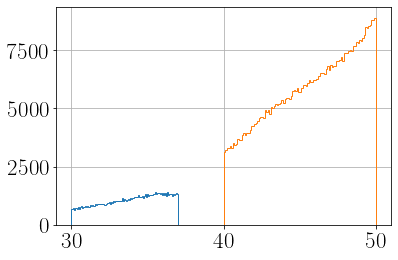

In [313]:
outbendingFD.Ptheta.hist(bins = np.linspace(30,37, 101), histtype = 'step')
outbendingCD.Ptheta.hist(bins = np.linspace(40,50, 101), histtype = 'step')

In [317]:
df_protonRec = copy(outbending.loc[:, ["Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi","Psector"]])
df_protonRecFD = copy(outbendingFD.loc[:, ["Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi","Psector"]])
df_protonRecCD = copy(outbendingCD.loc[:, ["Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi","Psector"]])

In [320]:
test = df_protonRecFD.Pp * 10000

In [321]:
df_protonRec.loc[df_protonRec.Psector<7,"test"] = test

In [323]:
df_protonRec

,Pp,Ptheta,Pphi,GenPp,GenPtheta,GenPphi,Psector,test
0,0.831381,62.661585,81.506328,0.785893,62.161258,81.009371,4110,NaN
1,1.015652,59.317807,-126.242111,1.008718,59.127674,-126.352385,4110,NaN
2,0.377110,45.520374,-25.850577,0.377360,48.549977,-24.925110,4100,NaN
3,0.409335,53.494214,15.930689,0.403881,54.523538,15.591250,4100,NaN
4,1.009003,48.318422,3.199845,1.083905,45.826601,3.067405,4100,NaN
...,...,...,...,...,...,...,...,...
211479,1.105596,59.211736,9.821697,1.055236,60.019950,9.616900,4110,NaN
211480,1.117669,22.910981,111.175333,1.116344,22.841832,111.354563,3,11176.688997
211481,0.814701,45.286105,-78.564325,0.777772,45.453252,-79.154294,4100,NaN
211482,0.370893,66.018867,-66.769546,0.384375,66.381185,-66.310071,4100,NaN


### Check

In [324]:
test_0 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/check/3111_CD_0.pkl")

In [325]:
test_CD = test_0.loc[test_0.Psector>7]

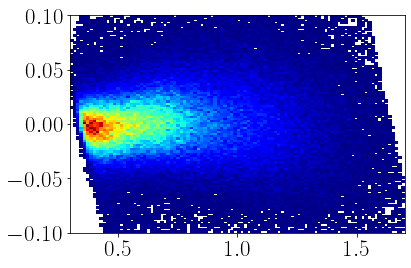

In [330]:
plt.hist2d(test_CD.Pp, test_CD.GenPp - test_CD.Pp, bins = [np.linspace(0.3, 1.7, 101), np.linspace(-0.1, 0.1, 101)], cmap = cmap, cmin = 1)
plt.show()

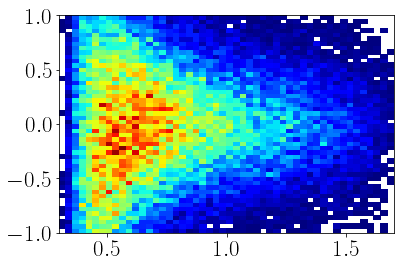

In [339]:
plt.hist2d(test_CD.Pp, test_CD.GenPtheta - test_CD.Ptheta, bins = [np.linspace(0.3, 1.7, 51), np.linspace(-1, 1, 51)], cmap = cmap, cmin = 1)
plt.show()

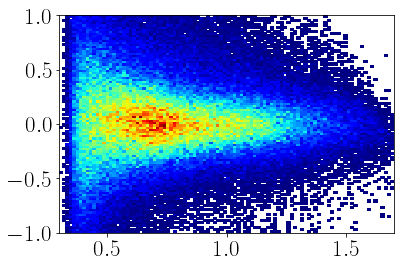

In [332]:
plt.hist2d(test_CD.Pp, test_CD.GenPphi - test_CD.Pphi, bins = [np.linspace(0.3, 1.7, 101), np.linspace(-1, 1, 101)], cmap = cmap, cmin = 1)
plt.show()

In [333]:
test_0 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/check/2942_CD_0.pkl")

In [334]:
test_CD = test_0.loc[test_0.Psector>7]

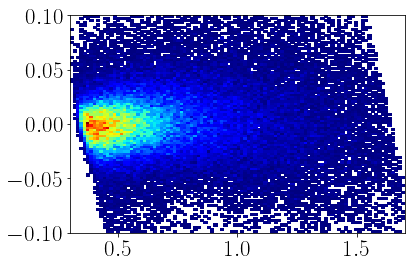

In [335]:
plt.hist2d(test_CD.Pp, test_CD.GenPp - test_CD.Pp, bins = [np.linspace(0.3, 1.7, 101), np.linspace(-0.1, 0.1, 101)], cmap = cmap, cmin = 1)
plt.show()

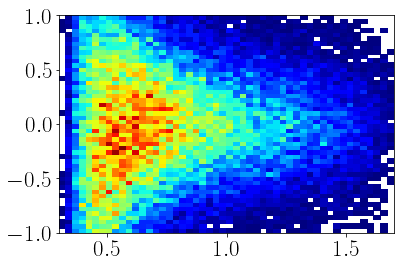

In [338]:
plt.hist2d(test_CD.Pp, test_CD.GenPtheta - test_CD.Ptheta, bins = [np.linspace(0.3, 1.7, 51), np.linspace(-1, 1, 51)], cmap = cmap, cmin = 1)
plt.show()

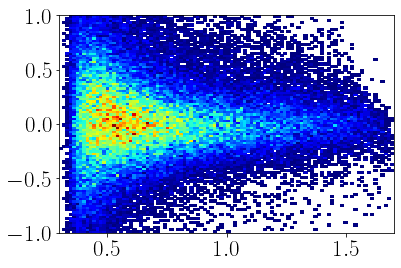

In [337]:
plt.hist2d(test_CD.Pp, test_CD.GenPphi - test_CD.Pphi, bins = [np.linspace(0.3, 1.7, 101), np.linspace(-1, 1, 101)], cmap = cmap, cmin = 1)
plt.show()

In [ ]:
print("Energy Loss cor")